# Ejercicio

#### El Dataset entregado presenta los datos de diferentes alimentos asociados a comida chatarra de diferentes empresas, la idea es analizar cuáles son los alimentos que son más dañinos para la salud. Se debe realizar lo siguiente:

1. Preprocesamiento de los datos: limpieza, revisión de datos faltantes/anómalos, reducción de datos (seleccionar características relevantes) y transformaciones.
2. Análisis exploratorio de los datos para responder al problema: ¿Qué características o valores hacen que un alimento se considere dañino para la salud?
3. Visualización de datos, debe entregar un informe con el fin de concluir el análisis realizado sobre que alimentos son dañinos para la salud.

#### Hoy día la relación que existe entre la comida rápida y la salud humana no es algo simple. hay factores que generan un impacto a largo plazo en la salud estos pueden ser formas de preparación, higiene, uso de aditivos, características como los niveles de grasas, azucares y sales son atributos que generan preocupación. 

#### Para entender el dataset es necesario hacer un entendimiento de los datos para ello inicialmente se busca entender atributos como las calorías, calorías provenientes de grasas grasa tota, grasa saturada, grasa trans, colesterol, sodio, carbohidratos, fibra, azucares, proteínas con el fin de ofrecer una toma de decisiones en hábitos alimenticios.

# **pre-procesamiento**

### **Librerias necesarias para la ejecucion del proyecto** 

In [93]:
# librerias para manejo de datos
import scipy
import random
import numpy as np
import pandas as pd
import warnings

# librerias para graficos chimbas 
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

### Cargamos la fuente de datos 

In [2]:
df = pd.read_csv('FastFoodNutrition.csv')
df.columns = [name.replace('\n', " ") for name in df.columns]#formatea bien los nombres de columnas

### Validamos algunos aspectos del dataset previo a su limpieza y transformacion

In [3]:
#df.head(10) #muestra los primeros 10 
df.sample(10)# muestra registros aleatoreos 

,Company,Item,Calories,Calories from Fat,Total Fat (g),Saturated Fat (g),Trans Fat (g),Cholesterol (mg),Sodium (mg),Carbs (g),Fiber (g),Sugars (g),Protein (g),Weight Watchers Pnts
888,KFC,Country Fried Steak with Peppered White Gravy,390,NaN,26,7,1,35,910,26,2,0,13,384
1002,Taco Bell,Breakfast Crunchwrap – Bacon,670,370,41,12,0,140,1270,50,4,3,21,NaN
163,McDonald’s,Sprite® (Large),310,0,0,0,0,0,80,83,0,83,0,393
755,KFC,Parmesan Garlic Croutons,60,NaN,3,0,0,0,135,8,<1,0,2,58
39,McDonald’s,Chicken McNuggets® (4 piece),190,110,12,2,0,25,360,12,1,0,9,183
217,McDonald’s,Nonfat Hazelnut Latte (Medium),220,0,0,0,0,5,115,46,0,46,9,257
333,Burger King,Double Whopper® Sandwich with Cheese,980,580,64,24,3,195,1410,50,2,11,52,963
938,Taco Bell,Black Bean Crunchwrap Supreme – Specialties,510,160,17,4.5,0,5,1080,77,8,6,13,NaN
758,KFC,Café Valley Lemon Cake (1 Slice),220,NaN,10,2,0,30,170,30,0,20,2,240
591,Wendy’s,"Coca-Cola Zero Sugar, Large",0,NaN,0,0,0,0,100,1,0,0,0,0


In [4]:
df.tail()# muestra los ultimos registros 

,Company,Item,Calories,Calories from Fat,Total Fat (g),Saturated Fat (g),Trans Fat (g),Cholesterol (mg),Sodium (mg),Carbs (g),Fiber (g),Sugars (g),Protein (g),Weight Watchers Pnts
1143,Pizza Hut,Hand Tossed Slices Ultimate Cheese Lover’s® Me...,230,NaN,10,4.5,0,25,390,25,2,1,11,NaN
1144,Pizza Hut,Hand Tossed Slices Ultimate Cheese Lover’s® Large,310,NaN,13,6,0,35,540,33,2,1,15,NaN
1145,Pizza Hut,Hand Tossed Slices Veggie Lover’s® Small,120,NaN,4,1.5,0,10,230,17,1,1,5,NaN
1146,Pizza Hut,Hand Tossed Slices Veggie Lover’s® Medium,200,NaN,6,2.5,0,15,370,27,2,2,8,NaN
1147,Pizza Hut,Hand Tossed Slices Veggie Lover’s® Large,260,NaN,9,4,0,20,510,36,3,3,11,NaN


In [5]:
df.info()#informacion basica de los tipos de datos existentes en el dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1148 entries, 0 to 1147
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Company               1148 non-null   object
 1   Item                  1148 non-null   object
 2   Calories              1147 non-null   object
 3   Calories from Fat     642 non-null    object
 4   Total Fat (g)         1091 non-null   object
 5   Saturated Fat (g)     1091 non-null   object
 6   Trans Fat (g)         1091 non-null   object
 7   Cholesterol (mg)      1147 non-null   object
 8   Sodium  (mg)          1147 non-null   object
 9   Carbs (g)             1091 non-null   object
 10  Fiber (g)             1091 non-null   object
 11  Sugars (g)            1147 non-null   object
 12  Protein (g)           1091 non-null   object
 13  Weight Watchers Pnts  887 non-null    object
dtypes: object(14)
memory usage: 125.7+ KB


In [6]:
# estadisticas basicas del dataset sin procesar 
df.describe()

,Company,Item,Calories,Calories from Fat,Total Fat (g),Saturated Fat (g),Trans Fat (g),Cholesterol (mg),Sodium (mg),Carbs (g),Fiber (g),Sugars (g),Protein (g),Weight Watchers Pnts
count,1148,1148,1147,642,1091,1091,1091,1147,1147,1091,1091,1147,1091,887
unique,6,1072,105,64,73,35,11,65,214,131,17,122,56,524
top,McDonald’s,29 fl oz,0,0,0,0,0,0,0,0,0,0,0,0
freq,329,11,83,175,357,383,954,378,54,75,551,190,314,67


#### **NOTA** Es evidente que el dataset no viene en el formato adecuado cuando el metodo describe no retorna las estadisticas basicas para datos numericos

In [7]:
#identifica columnas que contienen al menos un valor nulo
df.isnull().any() 

Company                 False
Item                    False
Calories                 True
Calories from Fat        True
Total Fat (g)            True
Saturated Fat (g)        True
Trans Fat (g)            True
Cholesterol (mg)         True
Sodium  (mg)             True
Carbs (g)                True
Fiber (g)                True
Sugars (g)               True
Protein (g)              True
Weight Watchers Pnts     True
dtype: bool

In [8]:
df.isnull().sum() 

Company                   0
Item                      0
Calories                  1
Calories from Fat       506
Total Fat (g)            57
Saturated Fat (g)        57
Trans Fat (g)            57
Cholesterol (mg)          1
Sodium  (mg)              1
Carbs (g)                57
Fiber (g)                57
Sugars (g)                1
Protein (g)              57
Weight Watchers Pnts    261
dtype: int64

In [9]:
#Identificamos una matriz de filas y columnas respectivamente 
df.shape

(1148, 14)

#### Analisis de datos faltantes 

In [10]:
#crea un dataframe ordenado de acuerdo al porcentaje de datos vacios por columna
pd.DataFrame({"Faltantes" : df.isna().sum(), "Porcentaje" : df.isna().sum() / df.shape[0] * 100}).sort_values('Porcentaje')

,Faltantes,Porcentaje
Company,0,0.000000
Item,0,0.000000
Calories,1,0.087108
Cholesterol (mg),1,0.087108
Sodium (mg),1,0.087108
Sugars (g),1,0.087108
Total Fat (g),57,4.965157
Saturated Fat (g),57,4.965157
Trans Fat (g),57,4.965157
Carbs (g),57,4.965157


#### Una vez realizado el analisis anterior se evidencia gran presencia de valores nulos y adicionalmente se evidencia que los datos no estan en un formato numerico adecuado para un analisis, lo que se debe hacer es una transformacion de los tipos de datos de manera masiva previo a la limpieza de los datos y el relleno de los datos faltantes.

#### **NOTA** columnas como Weight Watchers Pnts y Calories from Fat no se le pueden imputar datos dado que el analisis careceria de credibilidad 

In [11]:
df['Carbs (g)'].sample(10, random_state=45)

575      86
561      71
738      49
1056    NaN
1020    NaN
536      36
671      59
1059    NaN
733      67
880      61
Name: Carbs (g), dtype: object

#### se identifican valores "nulos" rellenos con espacios que no se identifican como nulos ademas se identifican caracteres como '<' en el dataset

In [12]:
print(sorted(df['Sodium  (mg)'].value_counts().keys(), reverse=True)[:3])
print(sorted(df['Calories'].value_counts().keys(), reverse=True)[:3])
print(sorted(df['Calories from Fat'].value_counts().keys(), reverse=True)[:3])
print(sorted(df['Total Fat (g)'].value_counts().keys(), reverse=True)[:3])
print(sorted(df['Saturated Fat (g)'].value_counts().keys(), reverse=True)[:3])
print(sorted(df['Trans Fat (g)'].value_counts().keys(), reverse=True)[:3])
print(sorted(df['Cholesterol (mg)'].value_counts().keys(), reverse=True)[:3])
print(sorted(df['Carbs (g)'].value_counts().keys(), reverse=True)[:3])
print(sorted(df['Fiber (g)'].value_counts().keys(), reverse=True)[:3])
print(sorted(df['Sugars (g)'].value_counts().keys(), reverse=True)[:3])
print(sorted(df['Protein (g)'].value_counts().keys(), reverse=True)[:3])
print(sorted(df['Weight Watchers Pnts'].value_counts().keys(), reverse=True)[:3])

['\xa0', '<1', '990']
['\xa0', '980', '960']
['\xa0', '90', '80']
['\xa0', '98', '9']
['\xa0', '9', '8']
['\xa0', '4.5', '4']
['\xa0', '<5', '95']
['\xa0', '<1', '99']
['\xa0', '<1', '9']
['\xa0', '<1', '99']
['\xa0', '9', '8']
['\xa0', '998', '981']


#### Contamos los ' ' en las diferentes columnas 

In [13]:
print(df['Sodium  (mg)'].value_counts()['\xa0'])
print(df['Calories'].value_counts()['\xa0'])
print(df['Calories from Fat'].value_counts()['\xa0'])
print(df['Total Fat (g)'].value_counts()['\xa0'])
print(df['Saturated Fat (g)'].value_counts()['\xa0'])
print(df['Trans Fat (g)'].value_counts()['\xa0'])
print(df['Cholesterol (mg)'].value_counts()['\xa0'])
print(df['Carbs (g)'].value_counts()['\xa0'])
print(df['Fiber (g)'].value_counts()['\xa0'])
print(df['Sugars (g)'].value_counts()['\xa0'])
print(df['Protein (g)'].value_counts()['\xa0'])
print(df['Weight Watchers Pnts'].value_counts()['\xa0'])

14
14
12
12
12
12
14
12
12
14
12
11


In [14]:
df.loc[661]

Company                                                  Wendy’s
Item                    Fresh Baked Biscuit with Natural Sausage
Calories                                                     590
Calories from Fat                                            NaN
Total Fat (g)                                                 41
Saturated Fat (g)                                             19
Trans Fat (g)                                                  0
Cholesterol (mg)                                             270
Sodium  (mg)                                                1270
Carbs (g)                                                     36
Fiber (g)                                                      1
Sugars (g)                                                     6
Protein (g)                                                   20
Weight Watchers Pnts                                         595
Name: 661, dtype: object

In [15]:
cuenta_keys = df['Carbs (g)'].value_counts()['<1']
print(f"numero de datos no numericos realmente \'<1\' total: {cuenta_keys}")

numero de datos no numericos realmente '<1' total: 1


#### tambien es pertinente eliminar toda la duplicidad del data set, inicialmente la identificamos con ... 


In [16]:
df.duplicated().sum()

7

In [17]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

#### Removemos las filas que no tienen informacion

In [18]:
df.isnull().sum() 

Company                   0
Item                      0
Calories                  1
Calories from Fat       506
Total Fat (g)            57
Saturated Fat (g)        57
Trans Fat (g)            57
Cholesterol (mg)          1
Sodium  (mg)              1
Carbs (g)                57
Fiber (g)                57
Sugars (g)                1
Protein (g)              57
Weight Watchers Pnts    261
dtype: int64

In [19]:
df[df['Sugars (g)'].isnull()] 

,Company,Item,Calories,Calories from Fat,Total Fat (g),Saturated Fat (g),Trans Fat (g),Cholesterol (mg),Sodium (mg),Carbs (g),Fiber (g),Sugars (g),Protein (g),Weight Watchers Pnts
64,McDonald’s,Salad Dressings,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
df.iloc[64:]

,Company,Item,Calories,Calories from Fat,Total Fat (g),Saturated Fat (g),Trans Fat (g),Cholesterol (mg),Sodium (mg),Carbs (g),Fiber (g),Sugars (g),Protein (g),Weight Watchers Pnts
64,McDonald’s,Salad Dressings,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65,McDonald’s,Newman’s Own® Creamy Southwest Dressing,100,50,6,1,0,20,340,11,0,3,1,103
66,McDonald’s,Newman’s Own® Creamy Caesar Dressing,190,170,18,3.5,0,20,500,4,0,2,2,193.5
67,McDonald’s,Newman’s Own® Low Fat Balsamic Vinaigrette,40,25,3,0,0,0,730,4,0,3,0,43
68,McDonald’s,Newman’s Own® Low Fat Family Recipe Italian Dr...,60,20,2.5,0,0,0,730,8,0,1,1,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1143,Pizza Hut,Hand Tossed Slices Ultimate Cheese Lover’s® Me...,230,NaN,10,4.5,0,25,390,25,2,1,11,NaN
1144,Pizza Hut,Hand Tossed Slices Ultimate Cheese Lover’s® Large,310,NaN,13,6,0,35,540,33,2,1,15,NaN
1145,Pizza Hut,Hand Tossed Slices Veggie Lover’s® Small,120,NaN,4,1.5,0,10,230,17,1,1,5,NaN
1146,Pizza Hut,Hand Tossed Slices Veggie Lover’s® Medium,200,NaN,6,2.5,0,15,370,27,2,2,8,NaN


In [21]:
df = df.drop(64)

In [22]:
df.iloc[64:]

,Company,Item,Calories,Calories from Fat,Total Fat (g),Saturated Fat (g),Trans Fat (g),Cholesterol (mg),Sodium (mg),Carbs (g),Fiber (g),Sugars (g),Protein (g),Weight Watchers Pnts
65,McDonald’s,Newman’s Own® Creamy Southwest Dressing,100,50,6,1,0,20,340,11,0,3,1,103
66,McDonald’s,Newman’s Own® Creamy Caesar Dressing,190,170,18,3.5,0,20,500,4,0,2,2,193.5
67,McDonald’s,Newman’s Own® Low Fat Balsamic Vinaigrette,40,25,3,0,0,0,730,4,0,3,0,43
68,McDonald’s,Newman’s Own® Low Fat Family Recipe Italian Dr...,60,20,2.5,0,0,0,730,8,0,1,1,60
69,McDonald’s,Newman’s Own® Ranch Dressing,170,130,15,2.5,0,20,530,9,0,4,1,175.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1143,Pizza Hut,Hand Tossed Slices Ultimate Cheese Lover’s® Me...,230,NaN,10,4.5,0,25,390,25,2,1,11,NaN
1144,Pizza Hut,Hand Tossed Slices Ultimate Cheese Lover’s® Large,310,NaN,13,6,0,35,540,33,2,1,15,NaN
1145,Pizza Hut,Hand Tossed Slices Veggie Lover’s® Small,120,NaN,4,1.5,0,10,230,17,1,1,5,NaN
1146,Pizza Hut,Hand Tossed Slices Veggie Lover’s® Medium,200,NaN,6,2.5,0,15,370,27,2,2,8,NaN


In [23]:
df.isnull().sum() 

Company                   0
Item                      0
Calories                  0
Calories from Fat       505
Total Fat (g)            56
Saturated Fat (g)        56
Trans Fat (g)            56
Cholesterol (mg)          0
Sodium  (mg)              0
Carbs (g)                56
Fiber (g)                56
Sugars (g)                0
Protein (g)              56
Weight Watchers Pnts    260
dtype: int64

#### Identificamos datos alfanumericos que deben ser numericos y los procesamos mediante expresiones regulares
**NOTA** no ejecutar 2 veces !!!

In [24]:
#df[df['Saturated Fat (g)'] == '5.5 g'] 
df.iloc[101:]

,Company,Item,Calories,Calories from Fat,Total Fat (g),Saturated Fat (g),Trans Fat (g),Cholesterol (mg),Sodium (mg),Carbs (g),Fiber (g),Sugars (g),Protein (g),Weight Watchers Pnts
102,McDonald’s,Hamburger Happy Meal,475,NaN,16,5.5 g,0,40,690,62,2,20,22,NaN
103,McDonald’s,4 Piece Chicken McNuggets Happy Meal,395,NaN,17,3.5,0,35,510,41,1,14,19,NaN
104,McDonald’s,6 Piece Chicken McNuggets® Happy Meal,475,NaN,22,4.5,0,50,680,46,2,14,24,NaN
105,McDonald’s,Fruit ‘n Yogurt Parfait (7 oz),160,20,2,1,0,5,85,31,1,21,4,178
106,McDonald’s,Low Fat Caramel Dip,70,5,0.5,0,0,5,35,15,0,9,0,79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1143,Pizza Hut,Hand Tossed Slices Ultimate Cheese Lover’s® Me...,230,NaN,10,4.5,0,25,390,25,2,1,11,NaN
1144,Pizza Hut,Hand Tossed Slices Ultimate Cheese Lover’s® Large,310,NaN,13,6,0,35,540,33,2,1,15,NaN
1145,Pizza Hut,Hand Tossed Slices Veggie Lover’s® Small,120,NaN,4,1.5,0,10,230,17,1,1,5,NaN
1146,Pizza Hut,Hand Tossed Slices Veggie Lover’s® Medium,200,NaN,6,2.5,0,15,370,27,2,2,8,NaN


In [25]:
datos_nominales = ['Company', 'Item']
for col in df.columns:
    if col not in datos_nominales:
        df[col] = pd.to_numeric(df[col].str.replace(r'[^0-9\.]', '', regex=True), errors='coerce')

In [26]:
#df[df['Saturated Fat (g)'] == '5.5 g'] 
df.iloc[1132:]


,Company,Item,Calories,Calories from Fat,Total Fat (g),Saturated Fat (g),Trans Fat (g),Cholesterol (mg),Sodium (mg),Carbs (g),Fiber (g),Sugars (g),Protein (g),Weight Watchers Pnts
1140,Pizza Hut,Hand Tossed Slices Supreme Medium,240.0,NaN,10.0,4.0,0.0,25.0,450.0,26.0,2.0,2.0,10.0,NaN
1141,Pizza Hut,Hand Tossed Slices Supreme Large,320.0,NaN,14.0,6.0,0.0,35.0,630.0,35.0,3.0,2.0,14.0,NaN
1142,Pizza Hut,Hand Tossed Slices Ultimate Cheese Lover’s® Small,150.0,NaN,6.0,2.5,0.0,15.0,250.0,16.0,1.0,1.0,6.0,NaN
1143,Pizza Hut,Hand Tossed Slices Ultimate Cheese Lover’s® Me...,230.0,NaN,10.0,4.5,0.0,25.0,390.0,25.0,2.0,1.0,11.0,NaN
1144,Pizza Hut,Hand Tossed Slices Ultimate Cheese Lover’s® Large,310.0,NaN,13.0,6.0,0.0,35.0,540.0,33.0,2.0,1.0,15.0,NaN
1145,Pizza Hut,Hand Tossed Slices Veggie Lover’s® Small,120.0,NaN,4.0,1.5,0.0,10.0,230.0,17.0,1.0,1.0,5.0,NaN
1146,Pizza Hut,Hand Tossed Slices Veggie Lover’s® Medium,200.0,NaN,6.0,2.5,0.0,15.0,370.0,27.0,2.0,2.0,8.0,NaN
1147,Pizza Hut,Hand Tossed Slices Veggie Lover’s® Large,260.0,NaN,9.0,4.0,0.0,20.0,510.0,36.0,3.0,3.0,11.0,NaN


In [27]:
#df.isnull().sum() 
#crea un dataframe ordenado de acuerdo al porcentaje de datos vacios por columna
pd.DataFrame({"Faltantes" : df.isna().sum(), "Porcentaje" : df.isna().sum() / df.shape[0] * 100}).sort_values('Porcentaje')

,Faltantes,Porcentaje
Company,0,0.000000
Item,0,0.000000
Calories,14,1.228070
Cholesterol (mg),14,1.228070
Sodium (mg),14,1.228070
Sugars (g),14,1.228070
Total Fat (g),68,5.964912
Saturated Fat (g),68,5.964912
Trans Fat (g),68,5.964912
Carbs (g),68,5.964912


#### Despues de la transformacion de datos se puede evidenciar que los porcentajes de valores nulos aumentaron puesto que los caracteres ' ' se reemplazaron por nulos, adicionalmente los datos ya estan formateados para un analisis numerico mas preciso

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1140 entries, 0 to 1147
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1140 non-null   object 
 1   Item                  1140 non-null   object 
 2   Calories              1126 non-null   float64
 3   Calories from Fat     623 non-null    float64
 4   Total Fat (g)         1072 non-null   float64
 5   Saturated Fat (g)     1072 non-null   float64
 6   Trans Fat (g)         1072 non-null   float64
 7   Cholesterol (mg)      1126 non-null   float64
 8   Sodium  (mg)          1126 non-null   float64
 9   Carbs (g)             1072 non-null   float64
 10  Fiber (g)             1072 non-null   float64
 11  Sugars (g)            1126 non-null   float64
 12  Protein (g)           1072 non-null   float64
 13  Weight Watchers Pnts  869 non-null    float64
dtypes: float64(12), object(2)
memory usage: 133.6+ KB


#### es determinante estandarizar los tipos de datos corruptos 

In [39]:
df = df.replace({'': np.nan})#es importante diferenciar los datos de tipo none con los datos de tipo nan de numpy
df = df.replace({None: np.nan})#es importante diferenciar los datos de tipo none con los datos de tipo nan de numpy
df.sample(10)# muestra registros aleatoreos 

,Company,Item,Calories,Calories from Fat,Total Fat (g),Saturated Fat (g),Trans Fat (g),Cholesterol (mg),Sodium (mg),Carbs (g),Fiber (g),Sugars (g),Protein (g),Weight Watchers Pnts
456,Burger King,16 fl oz,210.0,0.0,0.0,0.0,0.0,0.0,95.0,56.0,0.0,56.0,0.0,266.0
673,KFC,Limited Time Cinnabon Dessert Biscuits,290.0,NaN,13.0,7.0,0.0,5.0,580.0,40.0,2.0,17.0,4.0,310.0
934,Taco Bell,Quesadilla – Chicken,510.0,240.0,26.0,12.0,0.5,75.0,1250.0,38.0,4.0,2.0,27.0,NaN
954,Taco Bell,Black Beans (V),50.0,10.0,1.0,0.0,0.0,0.0,135.0,8.0,3.0,0.0,2.0,NaN
81,McDonald’s,Southern Style Chicken Biscuit (Large Size Bis...,470.0,220.0,24.0,9.0,0.0,30.0,1290.0,46.0,3.0,4.0,17.0,466.0
757,KFC,Café Valley Chocolate Chip Cake (1 Slice),300.0,NaN,15.0,3.0,0.0,50.0,260.0,39.0,1.0,27.0,4.0,326.0
375,Burger King,Buttery Garlic Croutons- Packet,60.0,20.0,2.5,0.0,0.0,10.0,180.0,9.0,0.0,1.0,1.0,60.0
901,Taco Bell,Quesarito – Online Exclusive,650.0,300.0,33.0,12.0,0.5,55.0,1390.0,67.0,6.0,5.0,22.0,NaN
392,Burger King,Capri Sun® 100% Apple Juice (6 fl oz),80.0,0.0,0.0,0.0,0.0,0.0,25.0,20.0,0.0,20.0,0.0,100.0
979,Taco Bell,Cheesy Bean & Rice Burrito – Value Menu,420.0,140.0,16.0,4.0,0.0,5.0,880.0,56.0,7.0,3.0,10.0,NaN


#### Imputamos un valor medio a todas las columnas con un porcentaje de datos vacio menor al 10% para tener un analisis mas preciso 

In [75]:
value1 = df['Protein (g)'].mean()
value2 = df['Fiber (g)'].mean()
value3 = df['Carbs (g)'].mean()
value4 = df['Trans Fat (g)'].mean()
value5 = df['Saturated Fat (g)'].mean()
value6 = df['Total Fat (g)'].mean()
value7 = df['Sugars (g)'].mean()
value8 = df['Sodium  (mg)'].mean()
value9 = df['Cholesterol (mg)'].mean()
value10 = df['Calories'].mean()

df['Protein (g)'].fillna(value=value1, inplace=True)
df['Fiber (g)'].fillna(value=value2, inplace=True)
df['Carbs (g)'].fillna(value=value3, inplace=True)
df['Trans Fat (g)'].fillna(value=value4, inplace=True)
df['Saturated Fat (g)'].fillna(value=value5, inplace=True)
df['Total Fat (g)'].fillna(value=value6, inplace=True)
df['Sugars (g)'].fillna(value=value7, inplace=True)
df['Sodium  (mg)'].fillna(value=value8, inplace=True)
df['Cholesterol (mg)'].fillna(value=value9, inplace=True)
df['Calories'].fillna(value=value10, inplace=True)

In [88]:
df.sample(10)# muestra registros aleatoreos 

,Company,Item,Calories,Calories from Fat,Total Fat (g),Saturated Fat (g),Trans Fat (g),Cholesterol (mg),Sodium (mg),Carbs (g),Fiber (g),Sugars (g),Protein (g),Weight Watchers Pnts
805,KFC,Diet Pepsi® Wild Cherry Pepsi® (16 fl oz),0.000000,NaN,0.00000,0.000000,0.000000,0.000000,50.000000,0.000000,0.000000,0.000000,0.00000,0.0
300,McDonald’s,Iced Caramel Latte (Large),230.000000,50.0,6.00000,3.500000,0.000000,15.000000,150.000000,40.000000,0.000000,40.000000,6.00000,267.5
1099,Pizza Hut,Pan Pizza Slices Pepperoni Medium,250.000000,NaN,11.00000,4.500000,0.000000,25.000000,470.000000,28.000000,2.000000,1.000000,10.00000,NaN
822,KFC,Lipton® Brisk® Raspberry Tea (20 fl oz),130.000000,NaN,0.00000,0.000000,0.000000,0.000000,70.000000,33.000000,0.000000,33.000000,0.00000,163.0
1055,Taco Bell,FOUNTAIN BEVERAGES (30 OZ),287.908526,NaN,11.70569,4.077892,0.140858,40.297513,428.097691,39.024254,1.454291,23.844583,9.43097,NaN
127,McDonald’s,Chocolate Triple Thick® Shake (21 fl oz cup),770.000000,160.0,18.00000,11.000000,1.000000,70.000000,330.000000,134.000000,1.000000,111.000000,18.00000,874.0
276,McDonald’s,Hazelnut Latte (Large),330.000000,80.0,9.00000,5.000000,0.000000,30.000000,130.000000,53.000000,0.000000,53.000000,9.00000,379.0
424,Burger King,Hash Browns – large,670.000000,390.0,44.00000,9.000000,0.000000,0.000000,1530.000000,65.000000,9.000000,0.000000,5.00000,674.0
296,McDonald’s,Iced Latte (Medium),100.000000,50.0,6.00000,3.500000,0.000000,15.000000,80.000000,8.000000,0.000000,8.000000,6.00000,105.5
900,Taco Bell,Black Bean Quesarito – Online Exclusive,630.000000,270.0,29.00000,10.000000,0.000000,35.000000,1260.000000,73.000000,7.000000,5.000000,19.00000,NaN


#### se actualiza el porcentaje de datos nulos en el dataset

In [90]:
#df.isnull().sum() 
#crea un dataframe ordenado de acuerdo al porcentaje de datos vacios por columna
pd.DataFrame({"Faltantes" : df.isna().sum(), "Porcentaje" : df.isna().sum() / df.shape[0] * 100}).sort_values('Porcentaje')

,Faltantes,Porcentaje
Company,0,0.000000
Item,0,0.000000
Calories,0,0.000000
Total Fat (g),0,0.000000
Saturated Fat (g),0,0.000000
Trans Fat (g),0,0.000000
Cholesterol (mg),0,0.000000
Sodium (mg),0,0.000000
Carbs (g),0,0.000000
Fiber (g),0,0.000000


# **Visualizacion**

### Inicialmente identificamos las compañias o cadenas y determinamos cual cadena predomina en el mercado.

In [91]:
df['Company'].unique() 

array(['McDonald’s', 'Burger King', 'Wendy’s', 'KFC', 'Taco Bell',
       'Pizza Hut'], dtype=object)

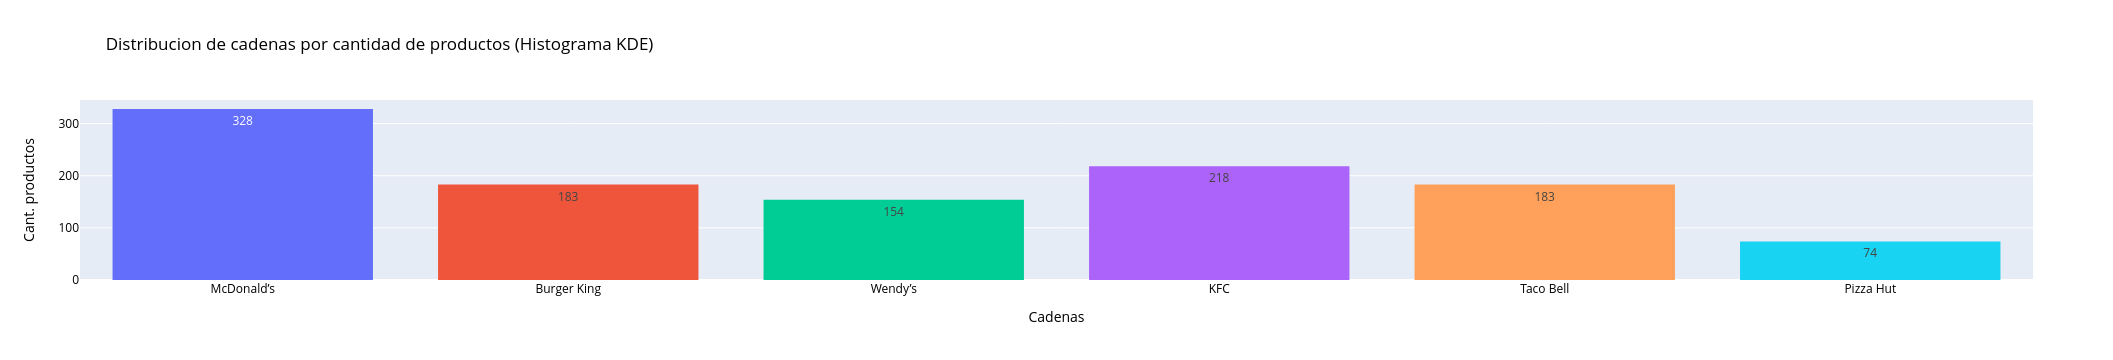

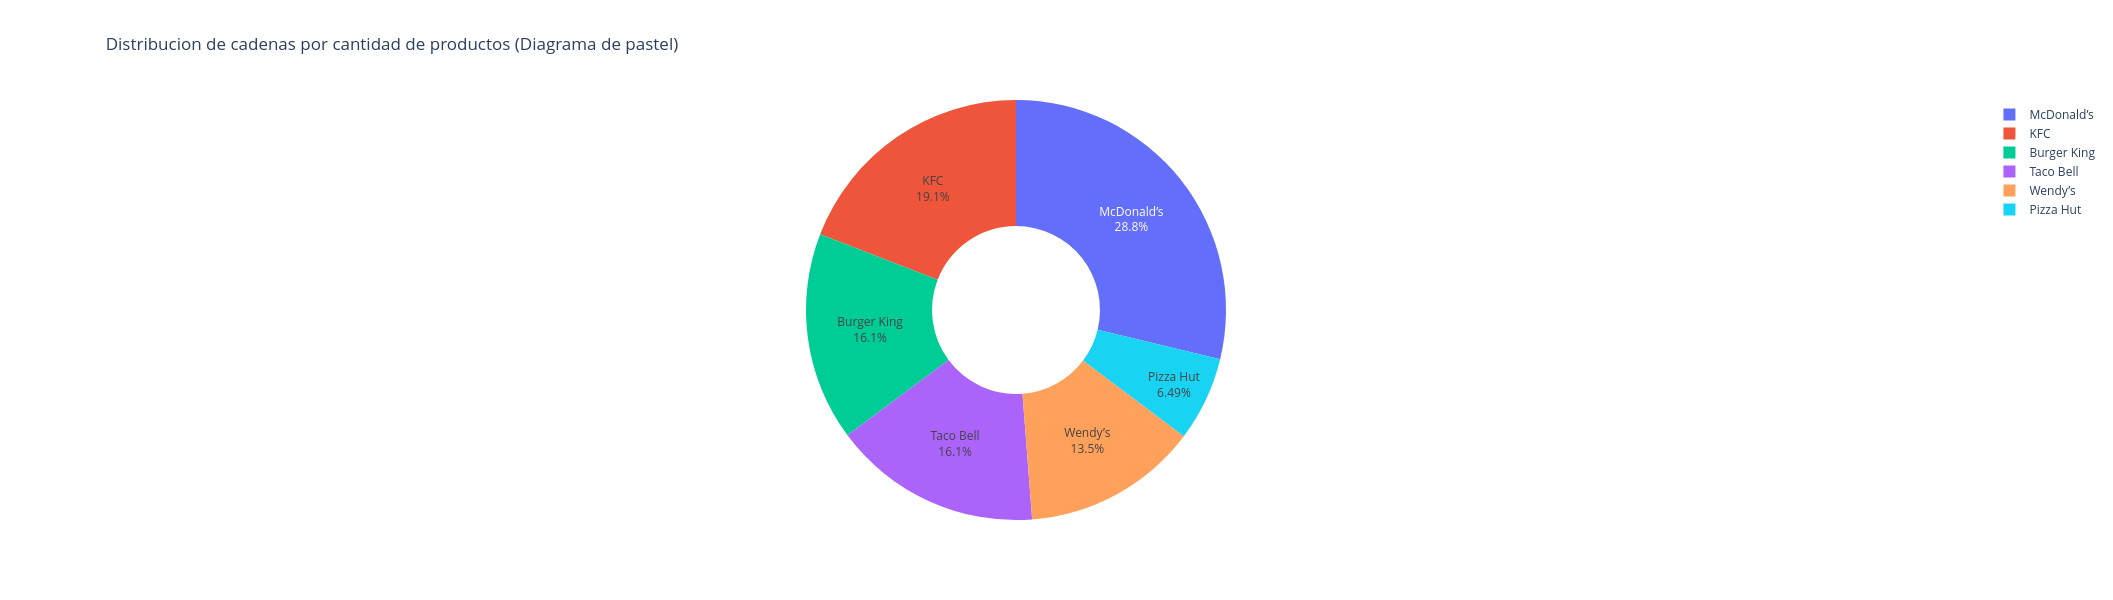

In [95]:
histograma = px.histogram(df, x='Company', text_auto=True,
                    title="Distribucion de cadenas por cantidad de productos (Histograma KDE)", color="Company")#

# Customize layout
histograma.update_layout(
    xaxis_title="Cadenas",
    yaxis_title="Cant. productos",
    font=dict(size=12, color="black"),  # Set font color and size
    showlegend=False,  # Hide legend for cleaner look
)

histograma.show(rendere='colab')

# Calculate company value counts
company_value_counts = df['Company'].value_counts()

# Create a pie chart
pie_chart = px.pie(company_value_counts,
                   names=company_value_counts.index,
                   values=company_value_counts.values,
                   hole=0.4,
                   height=600,
                   title="Distribucion de cadenas por cantidad de productos (Diagrama de pastel)",
                   labels={'index': 'Companies', 'value': 'Frequency Count'})

pie_chart.update_traces(
    textinfo='percent+label',
    hoverinfo='label+percent+value',  # Display additional info on hover
    textfont=dict(size=12),  # Set font size for text labels
)
pie_chart.show(rendere='colab')

#### un estimador de densidad de nucleo (KDE) es un algoritmo que busca modelar la distribución de probabilidad que generó un conjunto de datos. Para datos unidimensionales, por otro lado Un histograma divide los datos en contenedores discretos, cuenta la cantidad de puntos que se encuentran en cada contenedor y luego visualiza los resultados de manera intuitiva.

#### de los graficos anteriores podemos concluir que McDonald's tiene la mayoria de productos de comida rapida disponibles

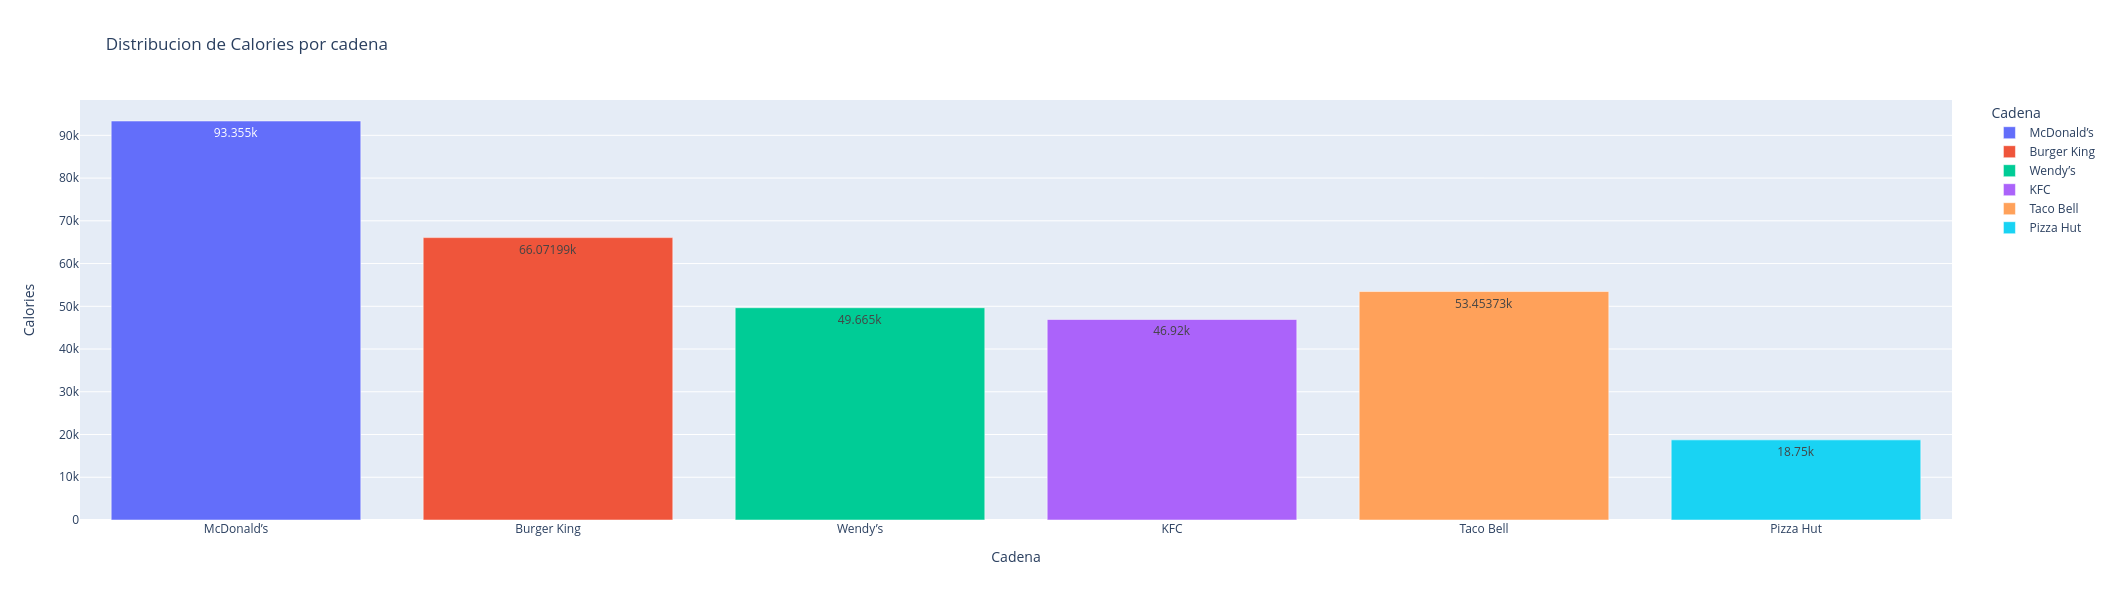

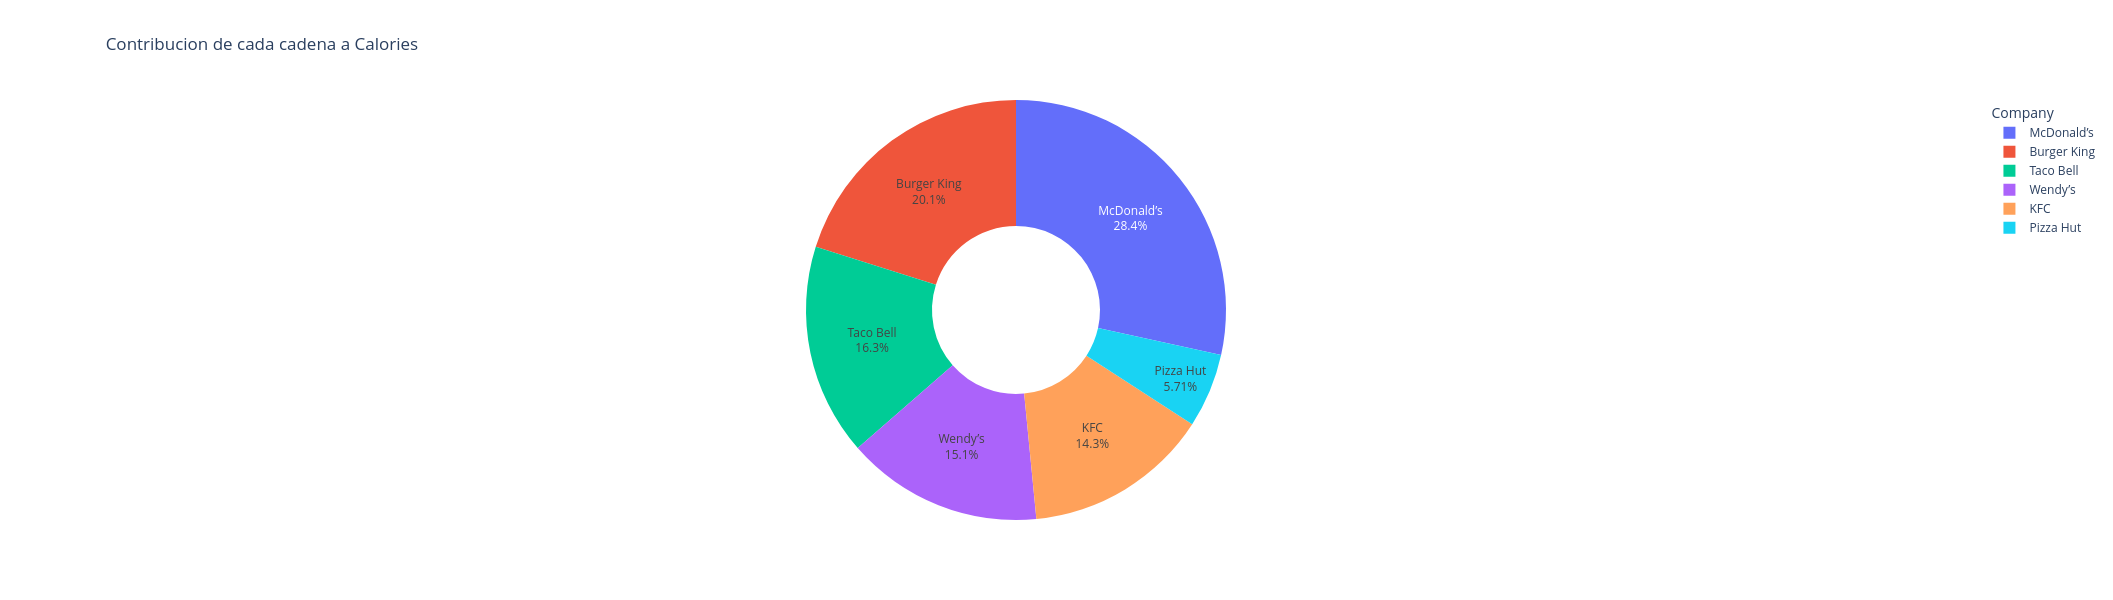

In [104]:
def create_histogram_and_pie(feature_name):
    # Histogram
    hist = px.histogram(df, x="Company", y=feature_name,
                        title=f"Distribucion de {feature_name} por cadena",
                        text_auto=True, nbins=50, color="Company", height=600)

    hist.update_layout(
        xaxis_title="Cadena",
        yaxis_title=feature_name,
        showlegend=True,
        legend_title="Cadena"
    )
    hist.update_traces(marker=dict(line=dict(color='white', width=0.5)))

    hist.show()

    # Pie chart
    pie_chart = px.pie(df, names="Company", values=feature_name,
                       hole=0.4, title=f"Contribucion de cada cadena a {feature_name}",
                       height=600,
                       labels={'Company': 'Companies',
                               feature_name: 'Total '},
                       )

    pie_chart.update_traces(textinfo='percent+label', textfont_size=12)
    pie_chart.update_layout(legend=dict(title='Company'), showlegend=True)

    pie_chart.show()
    
create_histogram_and_pie("Calories")#cambiar caracteristica     

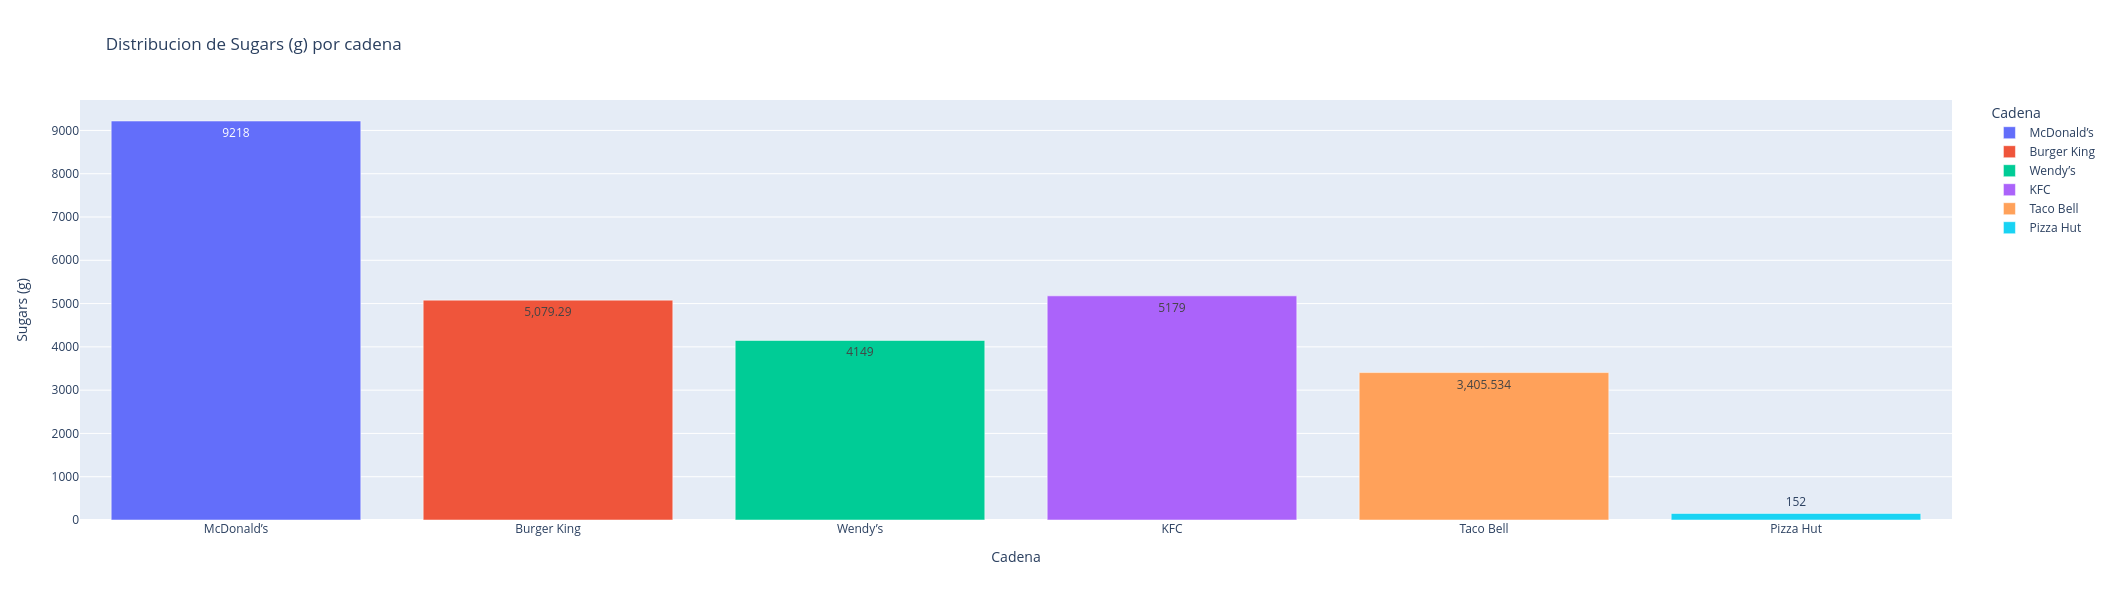

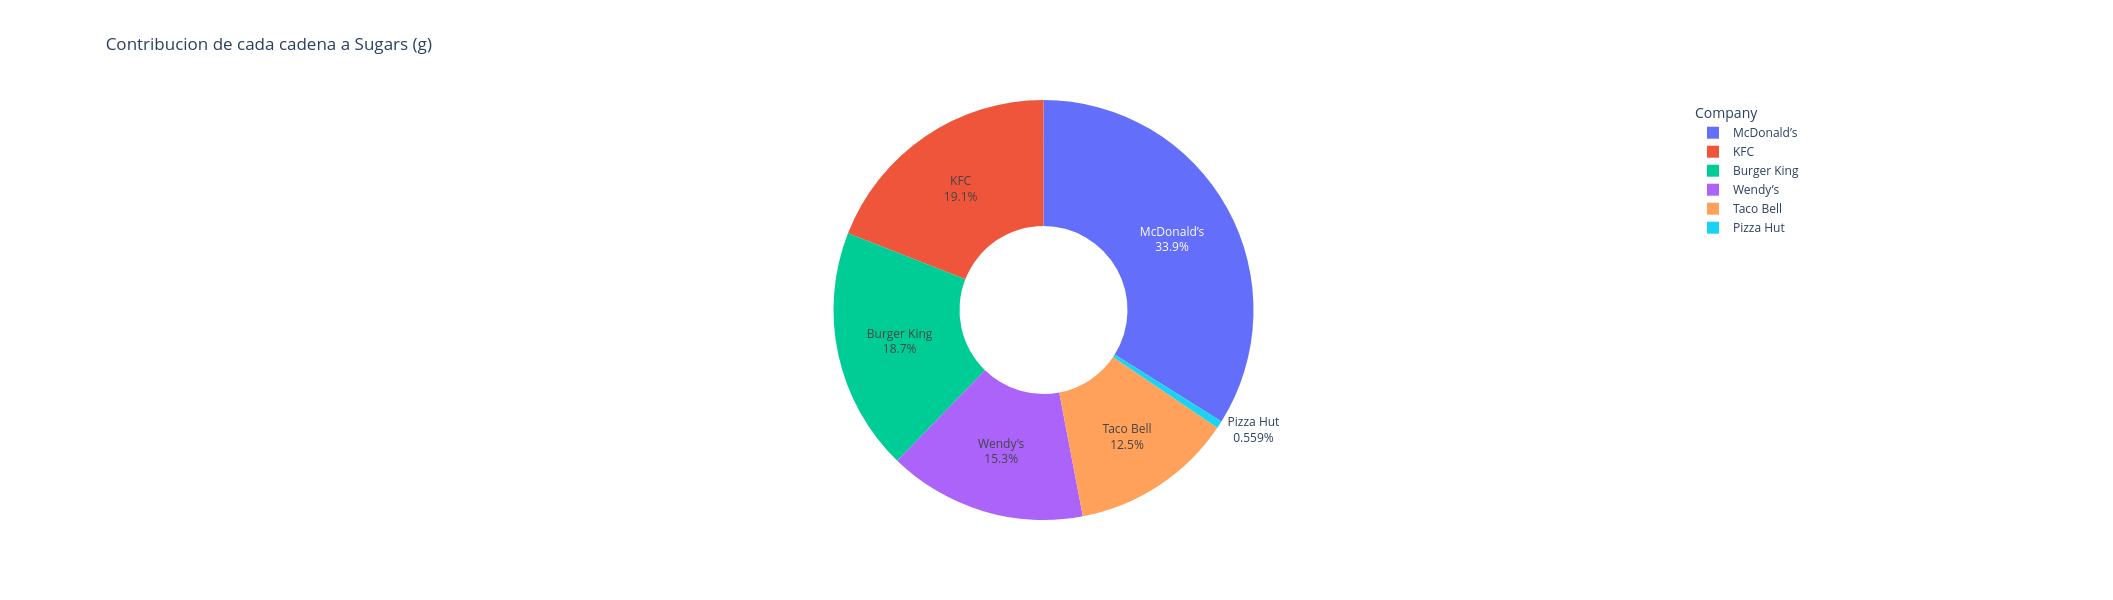

In [105]:
create_histogram_and_pie("Sugars (g)")#cambiar caracteristica     

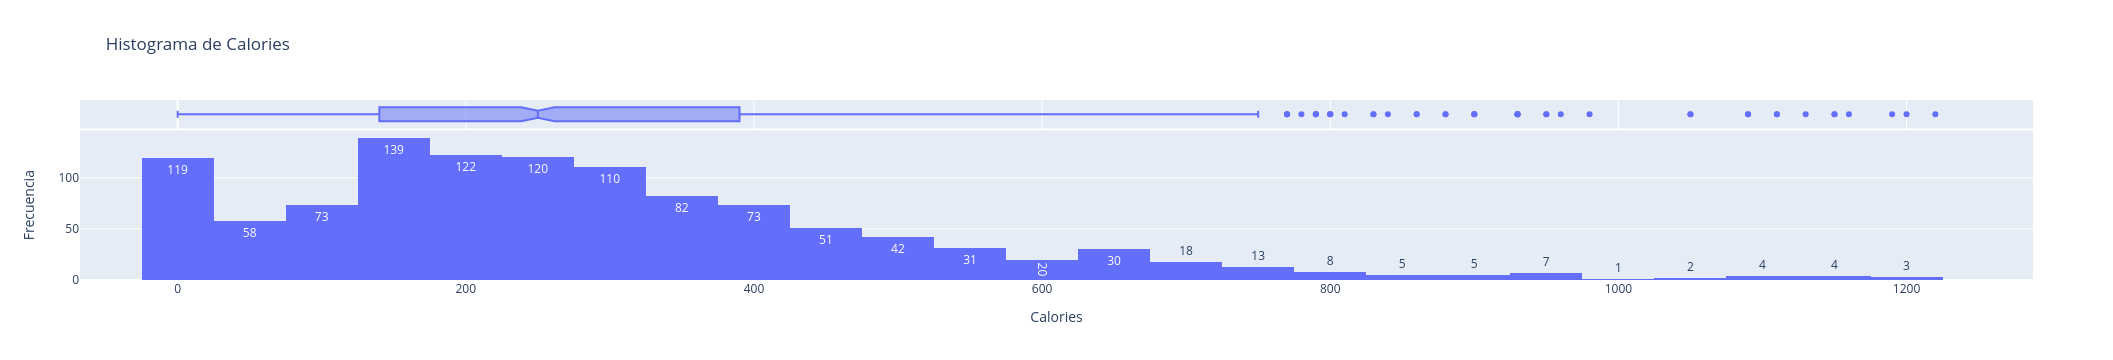

In [119]:
def create_hist(feature_name):
    values = sorted(df[feature_name])
    hist = px.histogram(x=values, marginal='box',
                        title=f"Histograma de {feature_name}", text_auto=True, nbins=50)
    hist.update_layout(
        xaxis_title=feature_name,
        yaxis_title="Frecuencia",
        showlegend=False
    )
    hist.show()
    
create_hist(feature_name="Calories")

#### Indice de calorias moderado, sin embargo se hace evidente que ciertos puntos de datos exhiben un comportamiento atípico, representando alimentos con valores calóricos extremadamente altos. Si bien estos casos podrían percibirse como atípicos dentro del alcance de este análisis, es importante contextualizar su presencia. En el ámbito de la diversidad de alimentos, no es raro que ciertos productos presenten valores calóricos excepcionalmente altos o bajos, lo que los hace distintos pero no necesariamente atípicos en el sentido convencional. Estas observaciones resaltan la naturaleza variada y dinámica de la industria alimentaria.

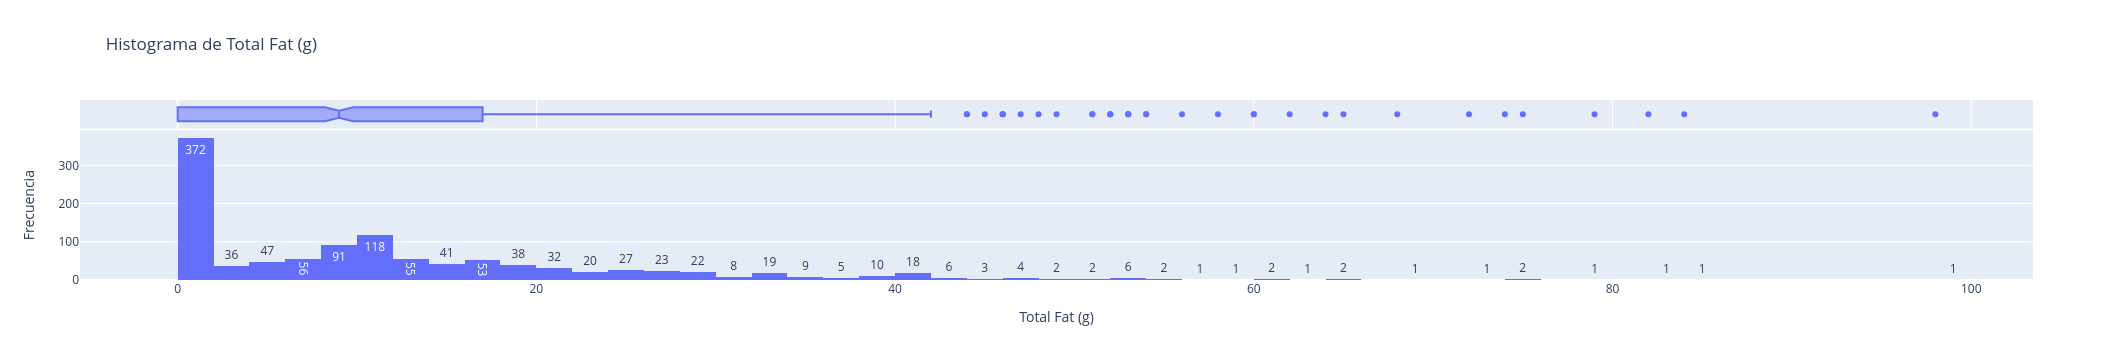

In [130]:
create_hist("Total Fat (g)")

####  Los alimentos caracterizados por un contenido excesivamente bajo de grasa pueden privar inadvertidamente a los consumidores de nutrientes esenciales vitales para el mantenimiento de las funciones corporales y el metabolismo energético. Por el contrario, una abundancia excesiva de "grasas totales (g)" puede generar resultados adversos, que incluyen aumento de peso, mayor susceptibilidad a enfermedades de salud y compromiso de la salud cardiovascular. Por lo tanto, un enfoque exigente dicta el cultivo de una composición de "Grasas Totales (g)" moderada y armoniosa.

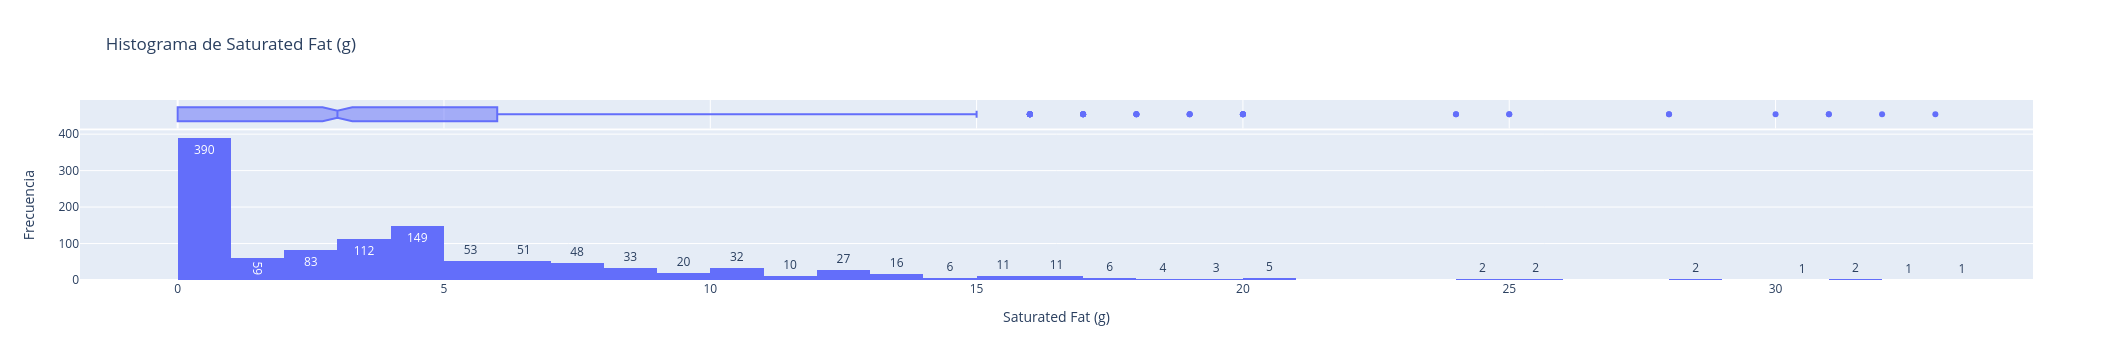

In [121]:
create_hist(feature_name="Saturated Fat (g)")

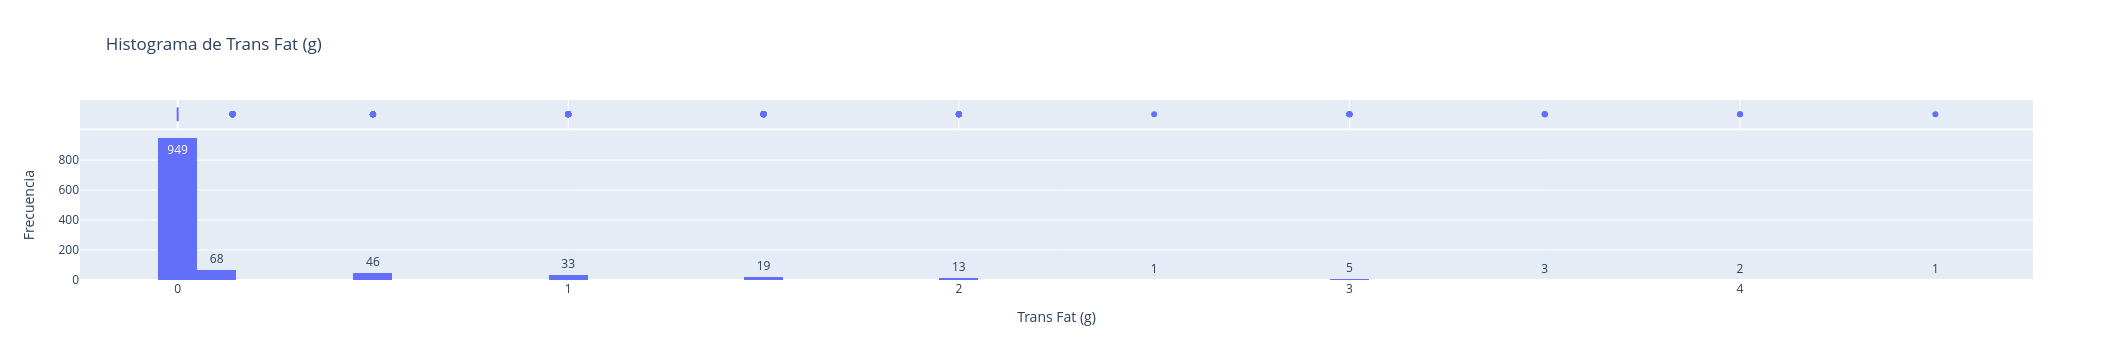

In [122]:
create_hist(feature_name="Trans Fat (g)")

#### la ingesta excesiva de colesterol puede provocar problemas de salud. Cuando se consume en exceso, el colesterol dietético puede contribuir a la acumulación de placa en las arterias, una condición conocida como aterosclerosis. Esto puede restringir el flujo sanguíneo y potencialmente provocar enfermedades cardiovasculares como ataques cardíacos y accidentes cerebrovasculares. Controlar la ingesta de colesterol es vital para mantener la salud cardiovascular y, a menudo, se recomienda a las personas que limiten el consumo de alimentos ricos en colesterol para mitigar el riesgo de efectos adversos para la salud.

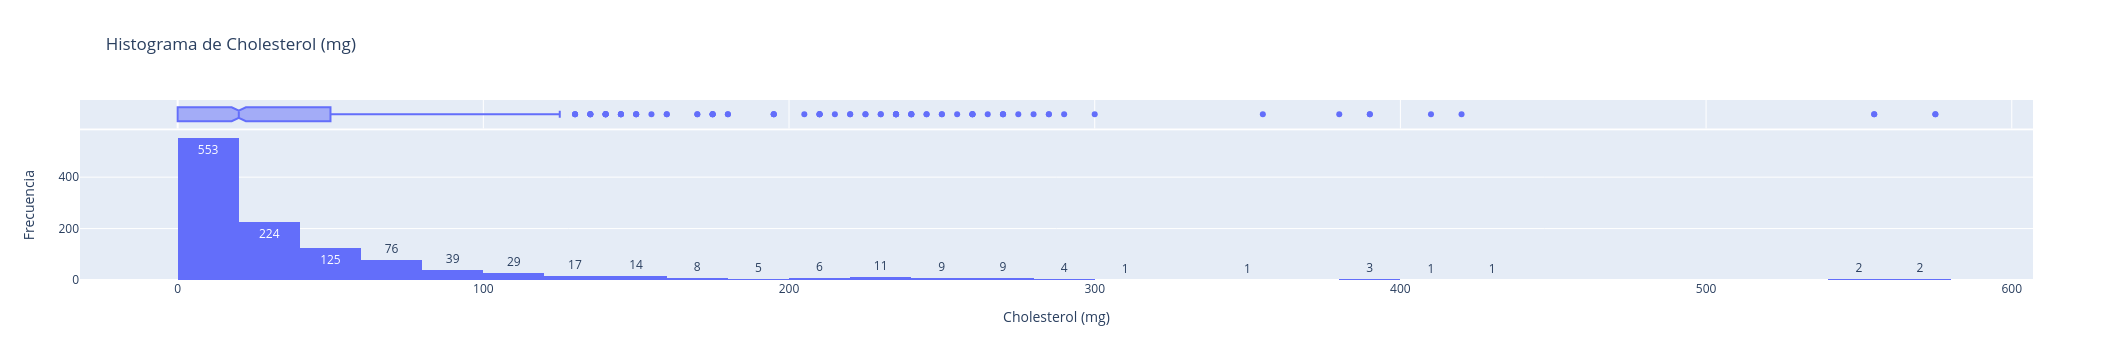

In [123]:
create_hist(feature_name="Cholesterol (mg)")

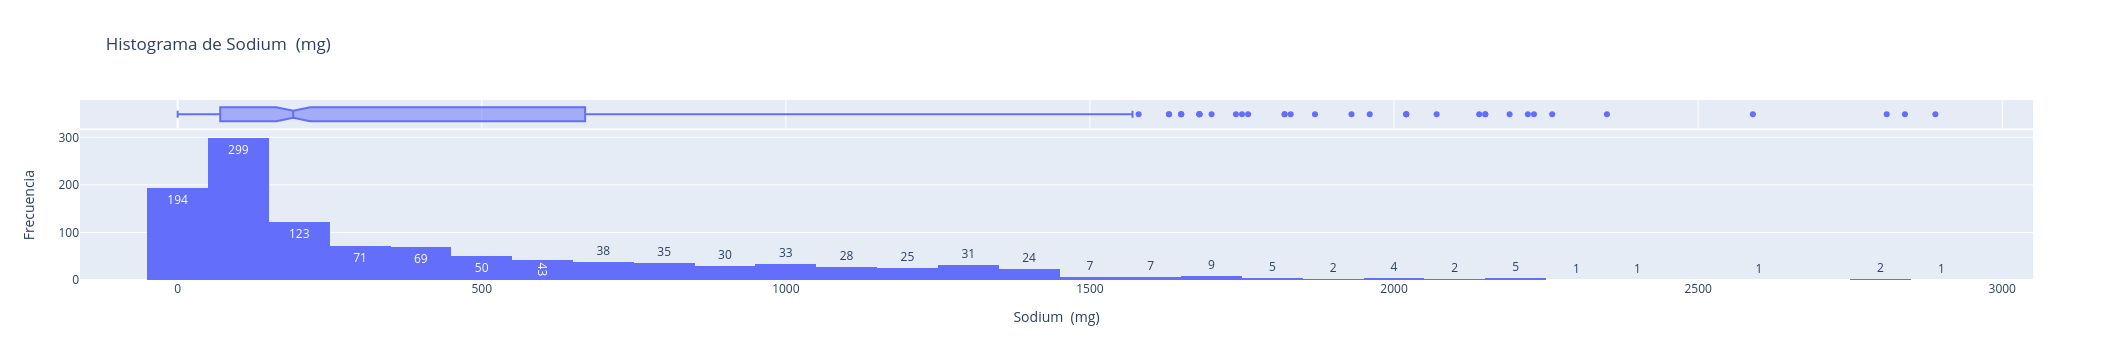

In [124]:
create_hist(feature_name="Sodium  (mg)")

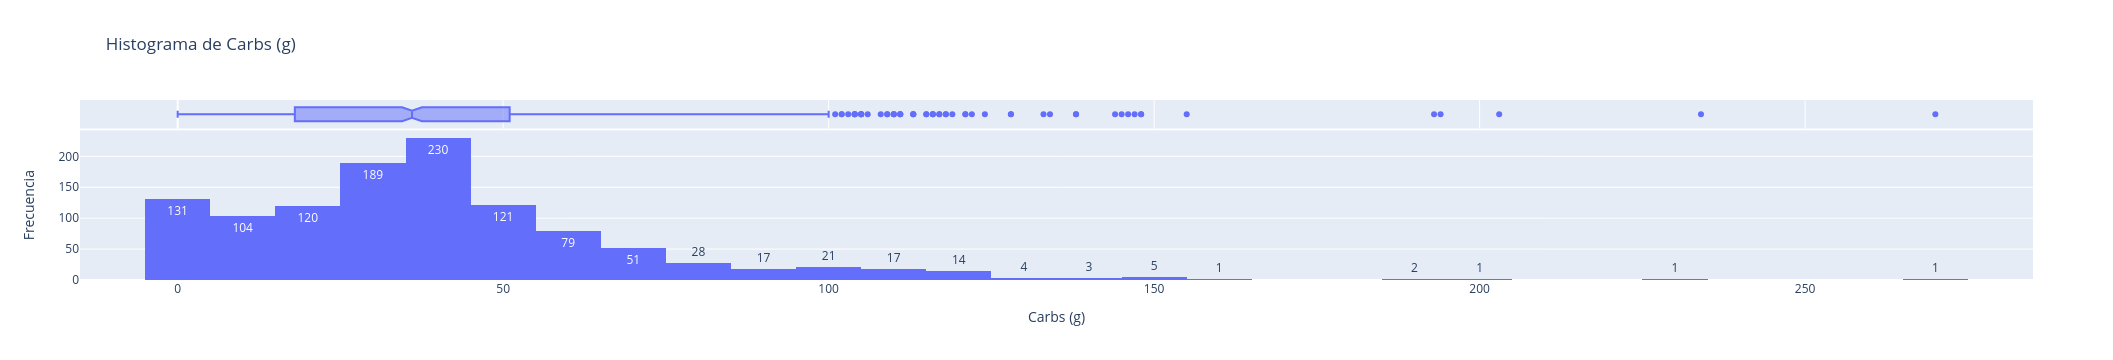

In [125]:
create_hist(feature_name="Carbs (g)")

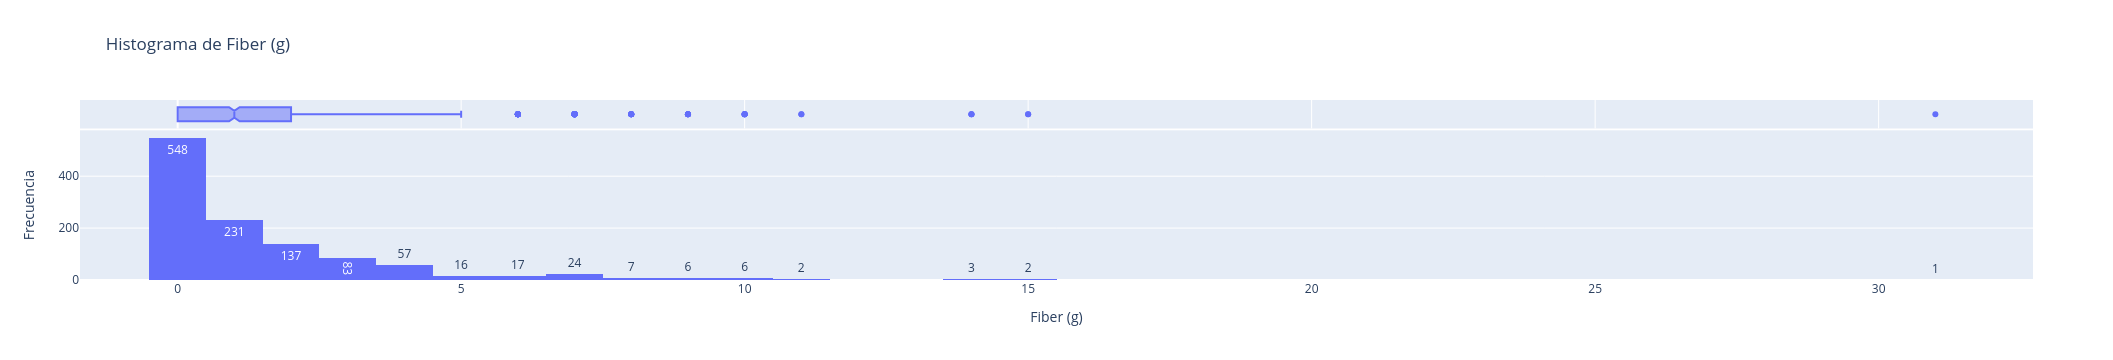

In [126]:
create_hist(feature_name="Fiber (g)")

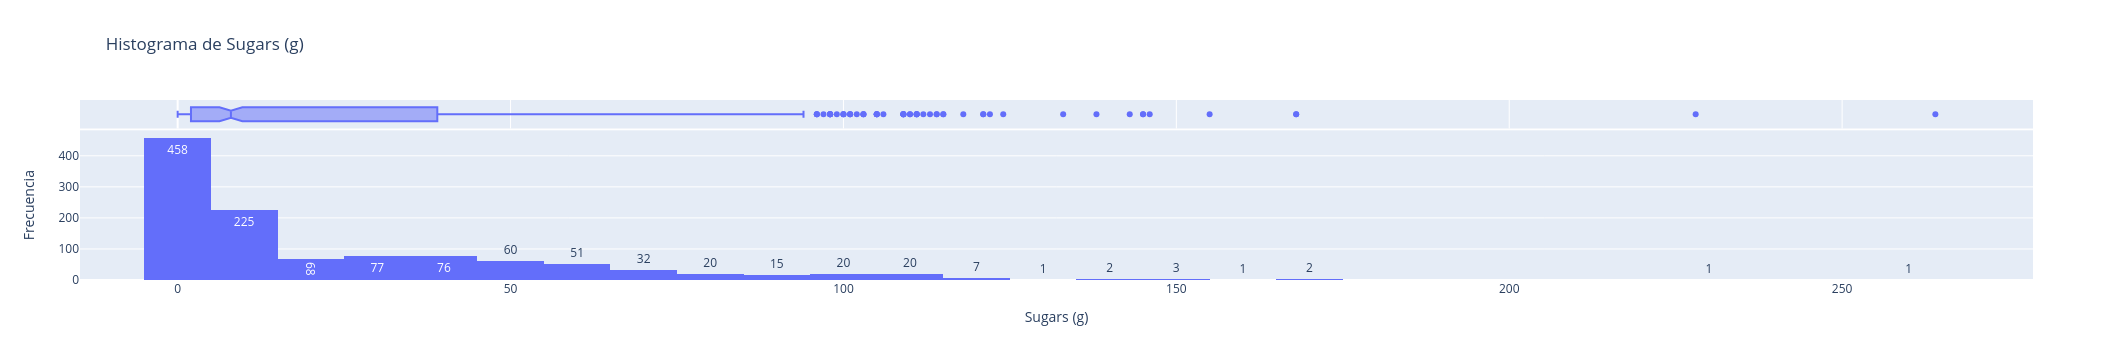

In [127]:
create_hist(feature_name="Sugars (g)")

#### Al profundizar en el impacto del azúcar en la salud humana, se hace evidente que el consumo excesivo de azúcar es perjudicial en lugar de contribuir. Esta comprensión hace pensar en McDonald's, Burger King y Taco Bell como actores clave en la producción de artículos que son menos conscientes de la salud.

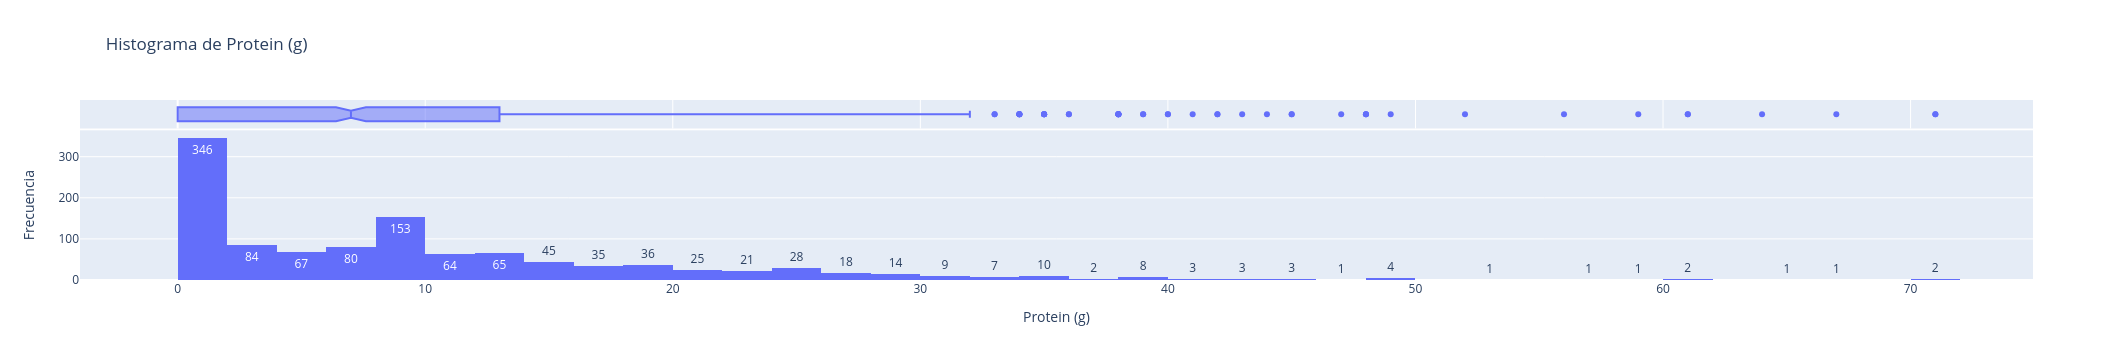

In [128]:
create_hist(feature_name="Protein (g)")

#### Es importante señalar que la relación entre la participación de mercado y el recuento total de calorías puede no ser lineal en todas las empresas. McDonald's y Pizza Hut, por ejemplo, pueden exhibir valores sesgados debido a sus respectivas cuotas de mercado, en lugar de ser indicativos del contenido calórico intrínseco. Un análisis más matizado, centrado en los perfiles individuales de las empresas, proporcionará una comprensión integral de cómo se entrelazan la presencia en el mercado y la composición calórica.

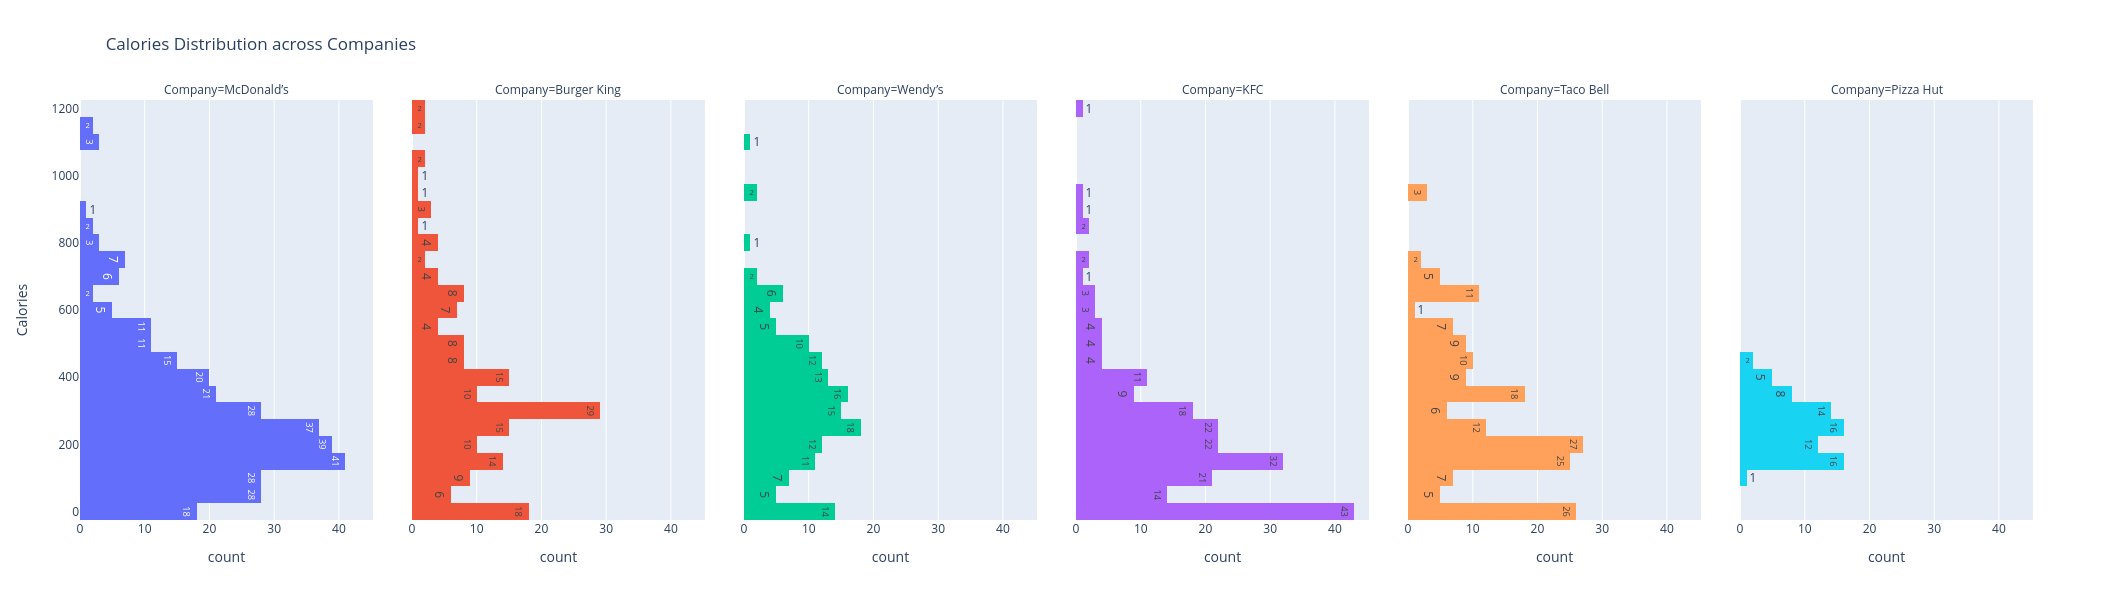

In [129]:
def create_categorized_hist(feature_name):
    hist = px.histogram(
        df,
        facet_col="Company",
        y=feature_name,
        title=f"{feature_name} Distribution across Companies",
        text_auto=True,
        nbins=50,
        color="Company",
        height=600
    )

    hist.update_layout(
        showlegend=False,
        yaxis_title=feature_name,
    )

    hist.show()
create_categorized_hist("Calories")    

#### Wendy's, KFC y Pizza Hut, donde emerge una tendencia alentadora. Estas empresas manifiestan en particular una clara propensión a obtener valores mínimos o casi nulos de calorías provenientes de la grasa. En particular, la prevalencia de valores cercanos a cero en KFC subraya su enfoque concienzudo para elaborar ofertas con menor contenido de grasa.

#### KFC y Wendy's demuestran una dedicación a ofertas conscientes de la salud. Si bien algunos artículos de distintas empresas pueden poseer atributos de salud cuestionables, su impacto general es menor. En particular, Pizza Hut sigue siendo un desafío de evaluar debido a su representación limitada en el conjunto de datos

# Correlaciones de caracteristicas

#### ahora es oportuno profundizar en el análisis explorando las correlaciones, las covarianzas y la naturaleza de las relaciones entre estas variables numéricas continuas. Esto nos permitirá descubrir información valiosa sobre cómo estas variables interactúan e influyen entre sí.

In [135]:
#df.drop(columns=['Weight Watchers Pnts','Calories from Fat'],inplace=True)# eliminamos columnas que pueden distorcionar el analisis dada su cantidad de valores nulos 

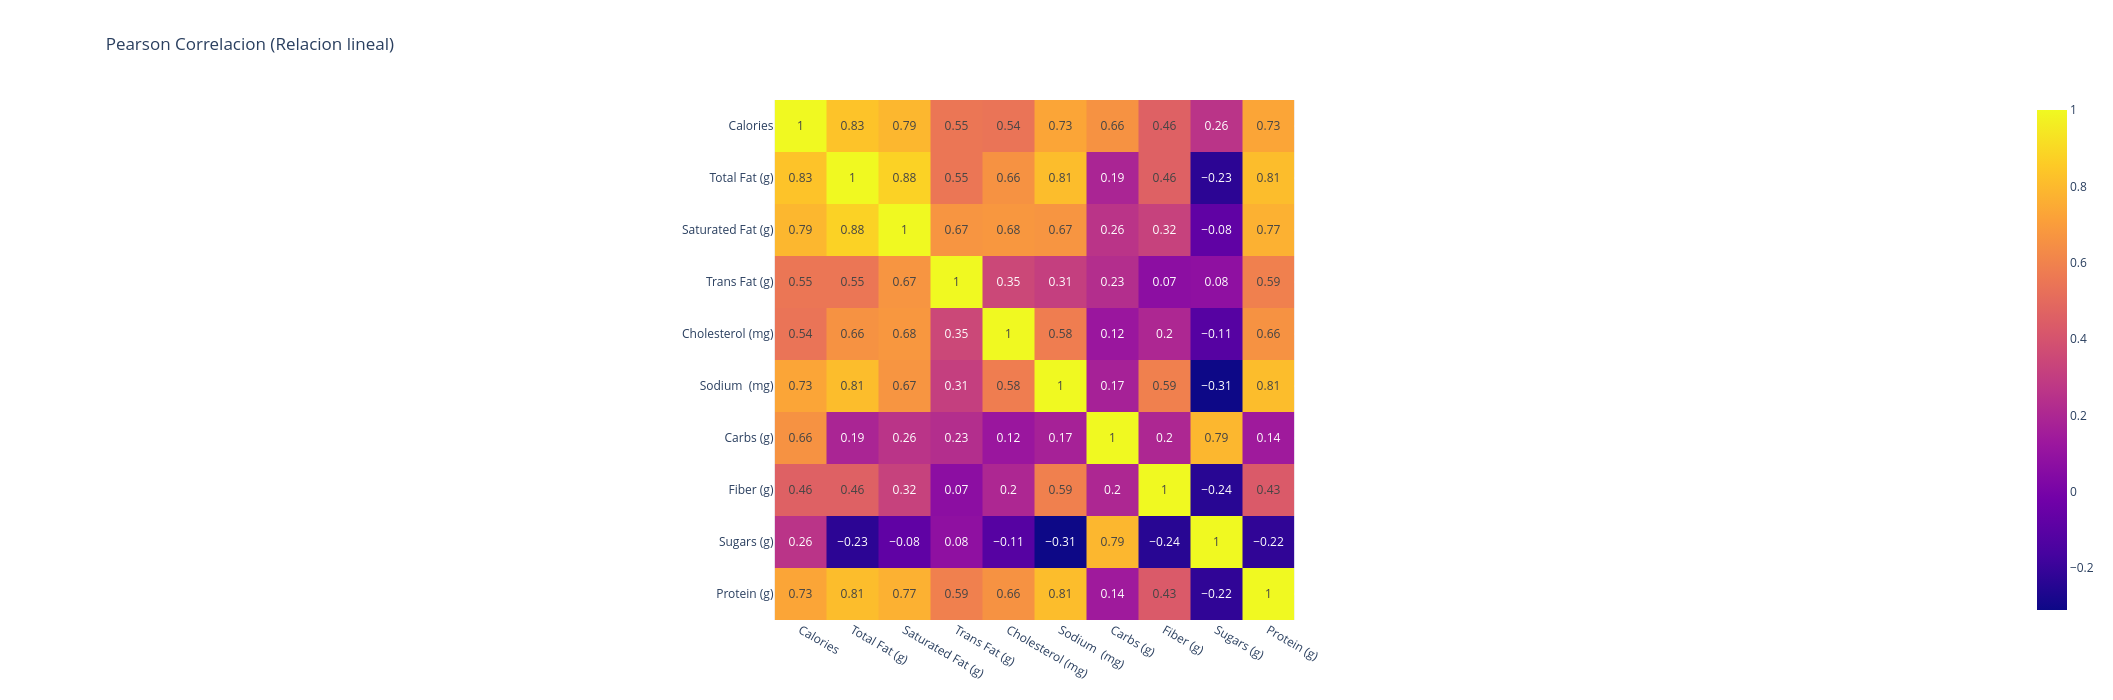

In [138]:
def plot_correlation_matrix(dataframe=df, correlation_method="spearman", title="Spearman Correlation"):
    num_df = dataframe.select_dtypes(include=np.number)
    df_corr = num_df.corr(method=correlation_method)
    corr_matrix = np.round(df_corr, 2)
    heatmap = px.imshow(corr_matrix, text_auto=True, height=700, title=title)
    heatmap.show()
plot_correlation_matrix(df, "pearson", "Pearson Correlacion (Relacion lineal)")    

#### Al analizar las matrices de correlación de Pearson, se hacen evidentes relaciones positivas fuertes y notables. Estos abarcan conexiones entre diversas variables, como calorías provenientes de grasas y calorías totales, grasas totales y calorías, grasas saturadas y calorías, entre otras.

#### se materializan correlaciones sólidas entre la grasa total y las calorías provenientes de la grasa, la grasa saturada y la grasa total, el sodio y las calorías provenientes de la grasa, el sodio y la grasa total. Surge un vínculo distintivo entre el azúcar y los carbohidratos.

#### Es esencial reconocer que estas relaciones son inherentemente lineales, una característica revelada por la matriz de correlación de Pearson, que identifica conexiones lineales radiales en los datos. Además, existen correlaciones sustanciales, como la correlación del 67% entre las grasas trans y el colesterol, así como las grasas saturadas y las calorías. **Es prudente centrarse en las relaciones con puntuaciones superiores a 0,7, lo que denota un nivel de correlación del 70 % o más.**

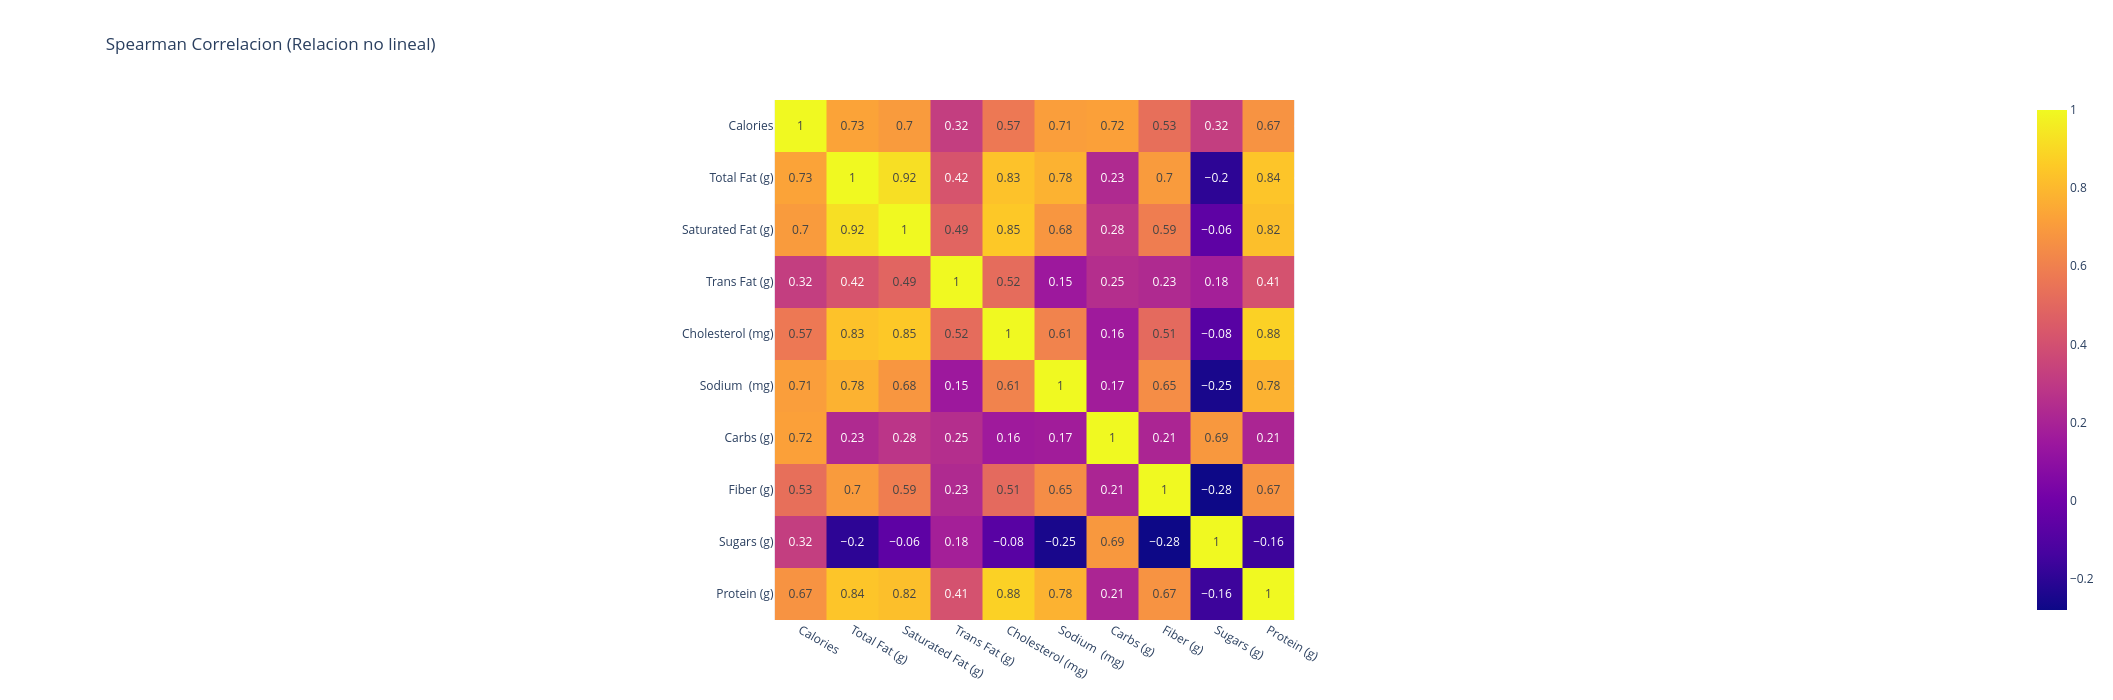

In [139]:
plot_correlation_matrix(df, "spearman", "Spearman Correlacion (Relacion no lineal)")

#### Examinar la matriz de correlación de Spearman resulta esencial para descubrir asociaciones no lineales dentro de los datos. Surge una observación interesante con respecto a la característica de los "carbohidratos". A diferencia de su correlación lineal en Pearson, Spearman destaca conexiones más fuertes entre los "carbohidratos" y variables como calorías, calorías provenientes de grasas, grasas totales y grasas saturadas

#### En particular, algunos coeficientes parecen más altos en Pearson pero más bajos en Spearman. Esta distinción se produce porque Spearman considera correlaciones más amplias, capturando relaciones no lineales que a menudo pasan desapercibidas por el enfoque de Pearson en las conexiones lineales.

#### Al analizar el diagrama de dispersión anterior, que ilustra la relación entre las variables características "calorías" y "calorías de grasa", surge una clara tendencia lineal. Esta tendencia está especialmente influenciada por una empresa, Burger King. Como observamos en nuestro análisis anterior de variables de características individuales, Burger King exhibe valores altos tanto para "calorías de grasa" como para "calorías". Es evidente que a medida que aumentan las "calorías", también aumenta el aporte de "calorías provenientes de la grasa".

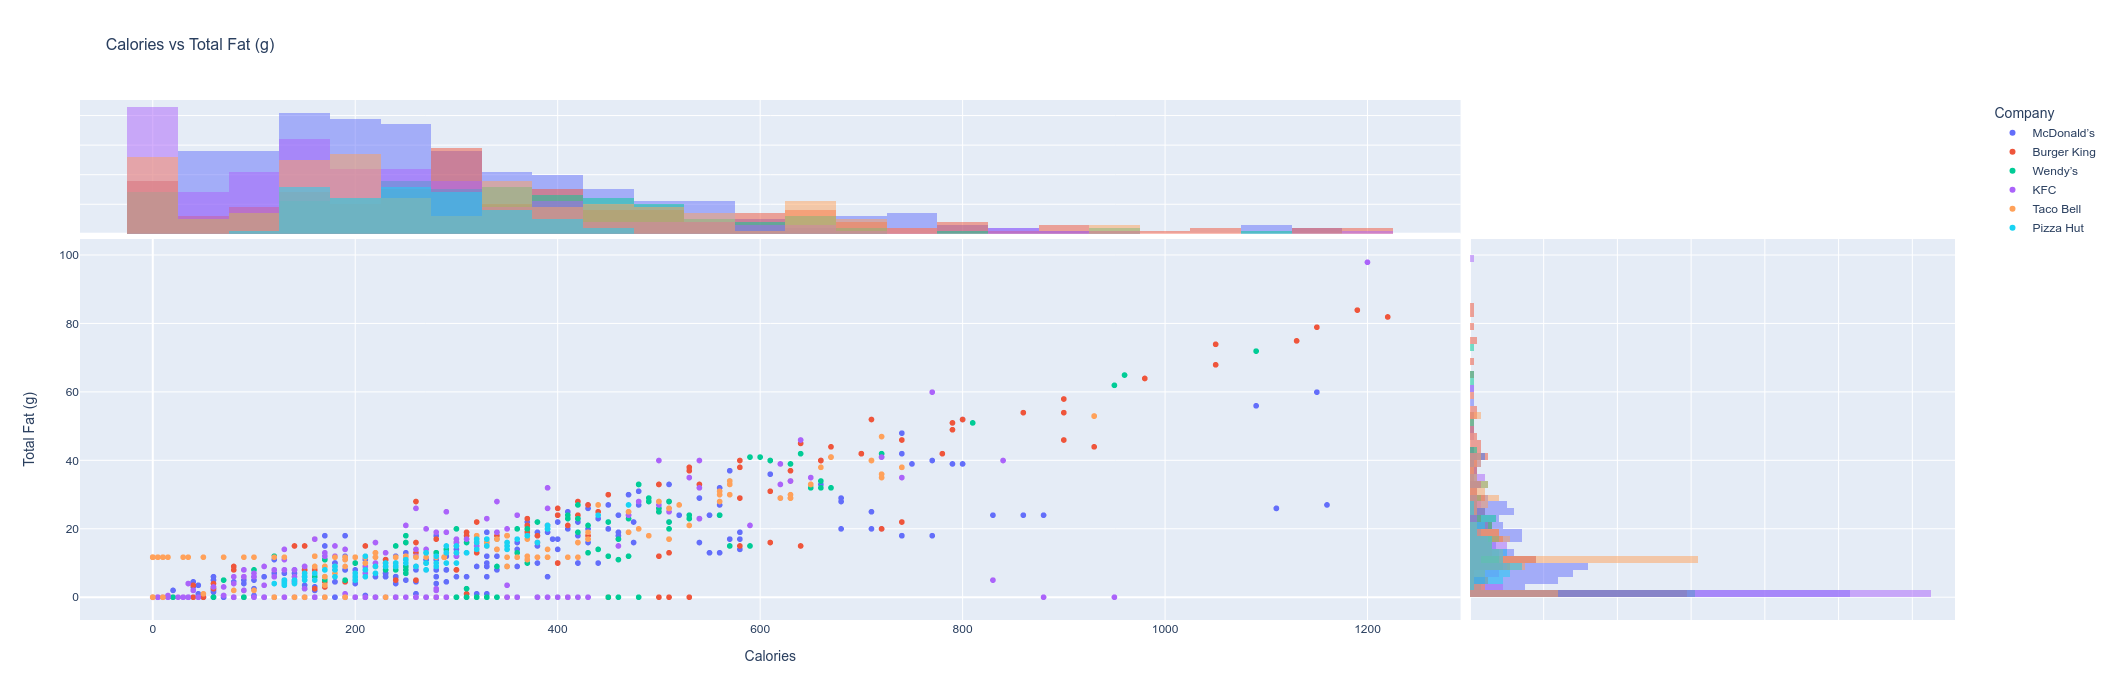

In [142]:
def create_scatter_plot(x_var:str, y_var:str, data_frame:pd.DataFrame=df, height:int=700, trendline:bool = False, color:bool=False):
    scatter_plot = px.scatter(
        data_frame=data_frame, x=x_var, y=y_var,
        color="Company" if color else None,
        trendline="ols" if trendline else None,
        marginal_x="histogram",
        marginal_y="histogram",
        height=height,
        labels={"Company": "Company", x_var: x_var, y_var: y_var},
        title=f"{x_var} vs {y_var}"
    )
    scatter_plot.update_layout(
        legend_title_text='Company',
        xaxis_title=x_var,
        yaxis_title=y_var,
        title_font_size=16,
        font=dict(family="Arial", size=12)
    )
    scatter_plot.show()
create_scatter_plot("Calories", "Total Fat (g)", color=True)    

#### Al examinar el diagrama de dispersión que representa la relación entre "calorías" y "grasa total en gramos", se hace evidente una concentración clara de los valores de grasa total en el rango inferior. Esta concentración está notablemente influenciada por empresas como Pizza Hut, Wendy's y KFC.

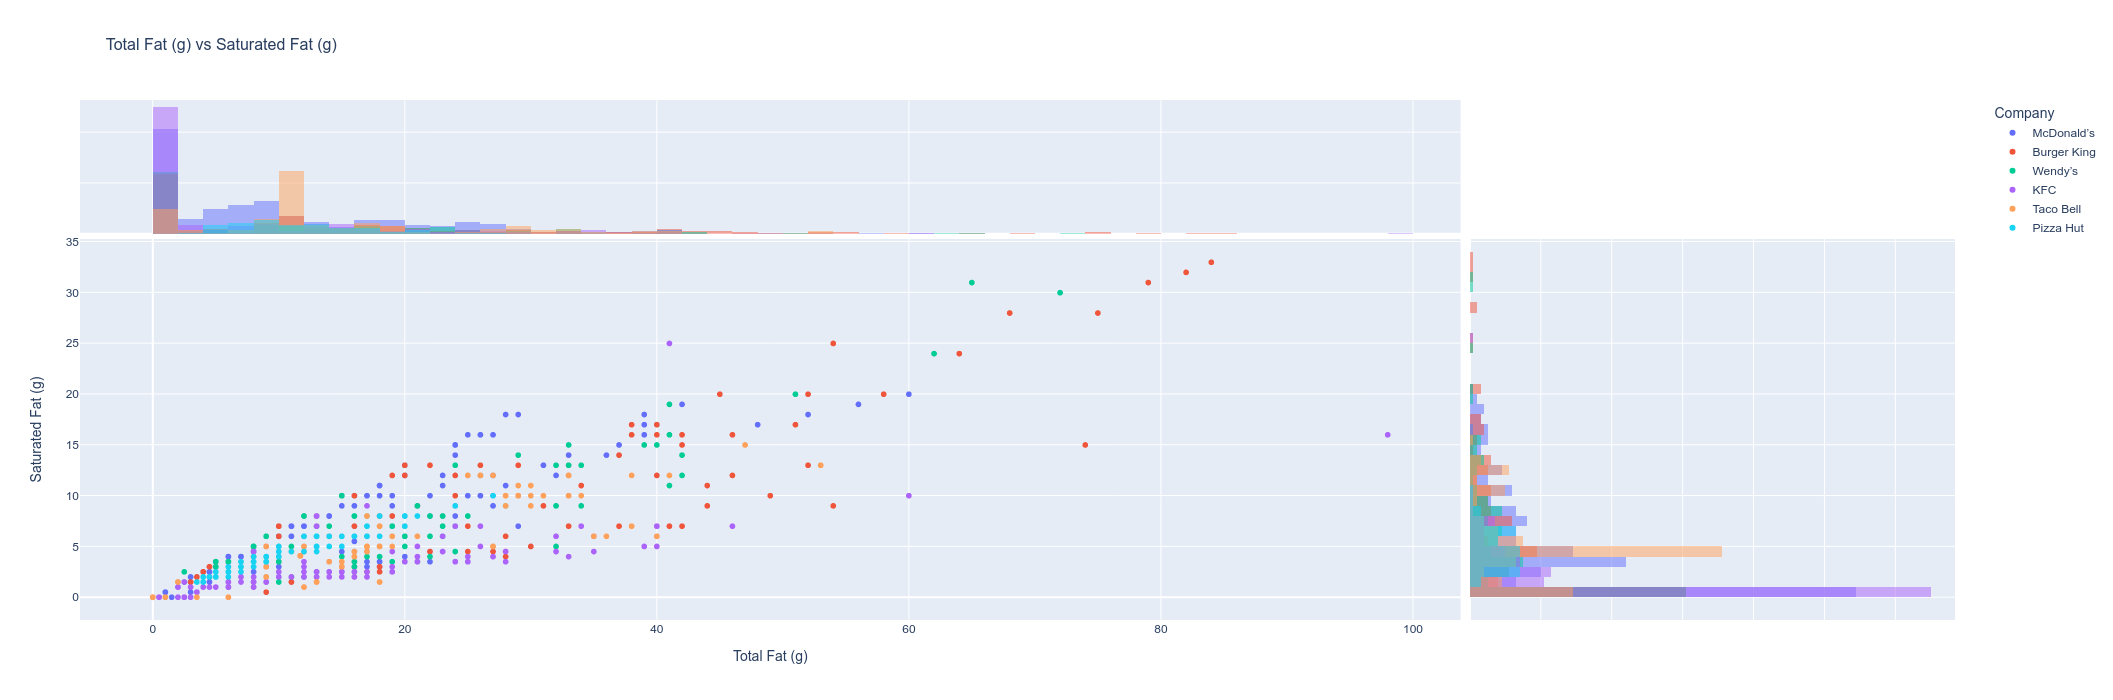

In [143]:
create_scatter_plot("Total Fat (g)", "Saturated Fat (g)", color=True)

#### La relación entre "grasas totales" y "grasas saturadas" de hecho muestra una correlación sólida, con un fuerte coeficiente de correlación de Pearson (0,89) y Spearman (0,86). Esta correlación se alinea con las expectativas, ya que un aumento en el contenido total de grasas tiende a coincidir con un aumento en el contenido de grasas saturadas, una conexión lógica y realista. Sin embargo, esta fuerte relación lineal se atribuye predominantemente a sólo tres empresas: McDonald's, Burger King y Taco Bell.

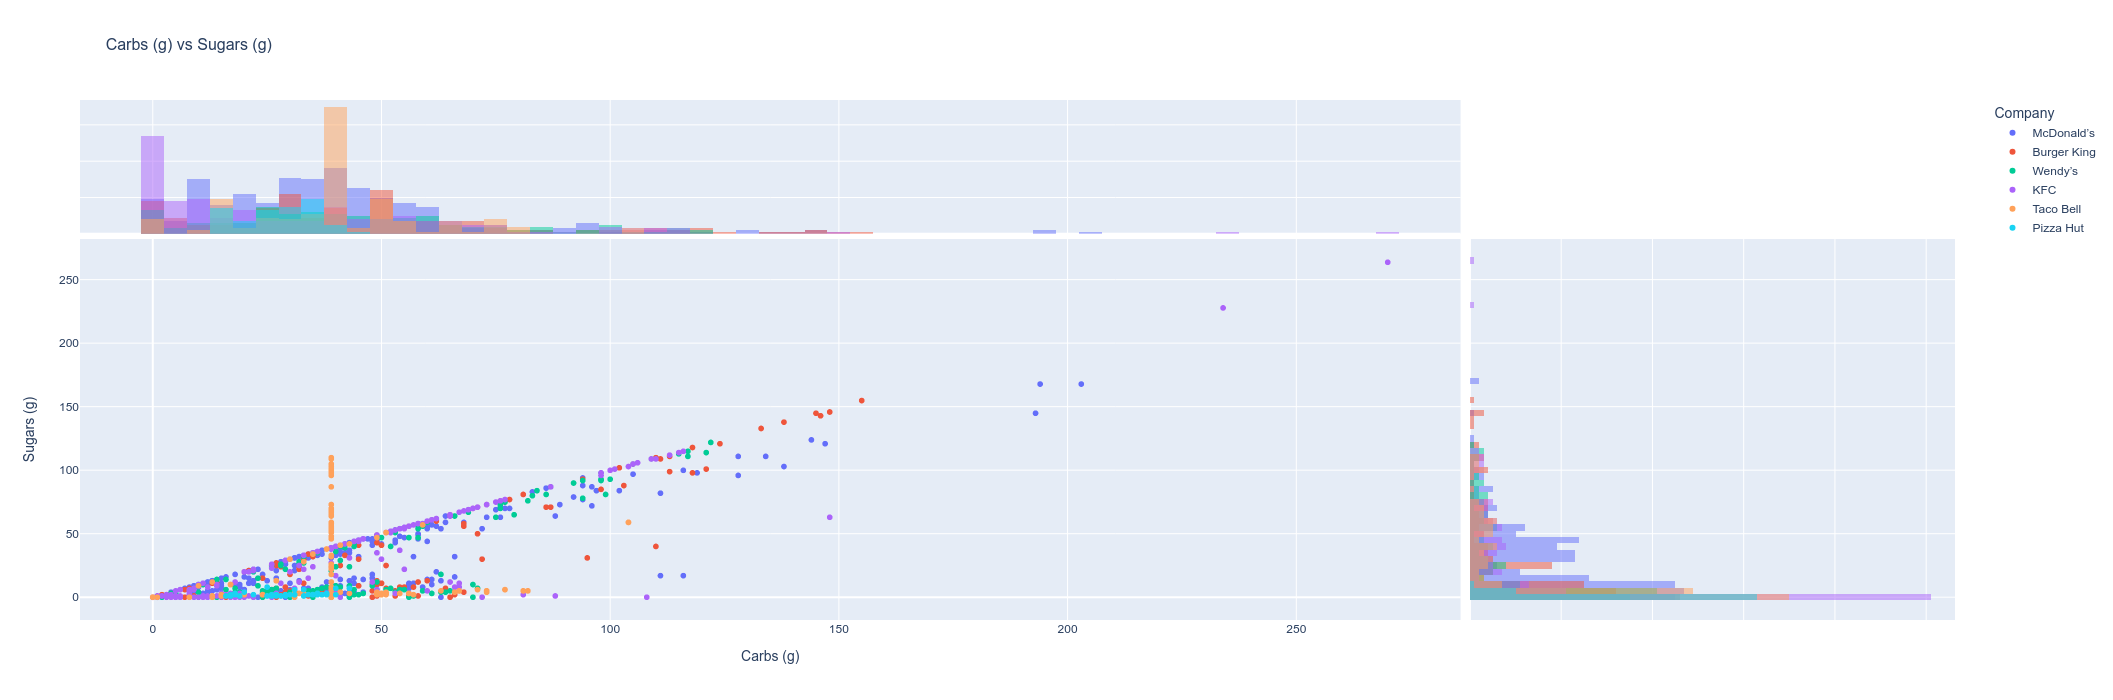

In [144]:
create_scatter_plot("Carbs (g)", "Sugars (g)", color=True)

#### La relación entre los azúcares y los carbohidratos es particularmente intrigante. Generalmente, muestra un patrón estrictamente lineal, con todos los puntos de datos ubicados a la derecha de la línea lineal

#### En particular, para empresas como Burger King, McDonald's y Taco Bell, sus puntos de datos residen exclusivamente en el lado derecho y nunca cruzan hacia la izquierda. Esto implica que cuando los valores de carbohidratos son altos, los valores de azúcar también lo son; No existe ningún escenario en el que los carbohidratos sean bajos y, sin embargo, el azúcar sea alto.